# **Installs**

In [1]:
# !pip install pydot --quiet
# !pip install gensim --quiet
# !pip install tensorflow-datasets --quiet
# !pip install -U tensorflow-text --quiet
# !pip install transformers --quiet
# !pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.1 MB/s eta 0:00:00


## **Imports**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# import torch.nn as nn
# import torch
# import torch.nn.functional as F
# from torch.nn import CrossEntropyLoss

from tqdm import tqdm
import pandas as  pd
from transformers import (
    BertTokenizer,
    BertModel,
    TFBertModel,
    BertConfig,
    AutoTokenizer,
    AutoModel,
)
# import tensorflow_datasets as tfds
# import torch
# from transformers import AdamW, get_linear_schedule_with_warmup
# from transformers.modeling_outputs import QuestionAnsweringModelOutput
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics
from numba import cuda

2023-08-05 18:50:03.668754: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-05 18:50:03.785054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 18:50:04.302695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/frost/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tf.config.run_functions_eagerly(True)

# **Data Load**

In [3]:
EMOCAUSE_PATH = '/content/drive/MyDrive/w266_final_project/data/EmoCause'
AUGMENT_PATH = '/content/drive/MyDrive/w266_final_project/data/AugmentExperiments'

In [4]:
# Local path
EMOCAUSE_PATH = './data/EmoCause'
AUGMENT_PATH = './data/AugmentExperiments'

In [5]:
emocause_train_preprocessed = pd.read_csv(f'{EMOCAUSE_PATH}/emocause_train_preprocessed.csv')
emocause_valid_preprocessed = pd.read_csv(f'{EMOCAUSE_PATH}/emocause_valid_preprocessed.csv')
emocause_test_preprocessed = pd.read_csv(f'{EMOCAUSE_PATH}/emocause_test_preprocessed.csv')

In [6]:
cause_model_name = 'mrm8488/spanbert-finetuned-squadv2'

spanbert_tokenizer = BertTokenizer.from_pretrained(cause_model_name)
spanbert_model = TFBertModel.from_pretrained(cause_model_name, output_hidden_states = True)

2023-08-05 18:50:06.519604: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-05 18:50:06.587323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-05 18:50:06.587440: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
emocause_train_preprocessed.head()

,Unnamed: 0,original_situation,emotion,cause_span,start_index,end_index,emotion_label
0,3651,one time i saw a giant cockroach under my desk!,__surprised__,giant cockroach,6,8,29
1,3375,i started a diet today and as soon as i got ho...,__guilty__,diet today and as soon as i got home i ate a b...,4,17,18
2,2609,i was late for a meeing.,__terrified__,late,3,3,30
3,308,i was buying some beer and smokes with a coupl...,__surprised__,full blown speakeasy,69,73,29
4,287,my husband was ordained to be a minister last ...,__proud__,husband was ordained to be a minister last yea...,2,27,26


In [8]:
target_names = list(np.unique(emocause_train_preprocessed[['emotion_label', 'emotion']].sort_values(['emotion_label'])['emotion']))
target_names

['__afraid__',
 '__angry__',
 '__annoyed__',
 '__anticipating__',
 '__anxious__',
 '__apprehensive__',
 '__ashamed__',
 '__caring__',
 '__confident__',
 '__content__',
 '__devastated__',
 '__disappointed__',
 '__disgusted__',
 '__embarrassed__',
 '__excited__',
 '__faithful__',
 '__furious__',
 '__grateful__',
 '__guilty__',
 '__hopeful__',
 '__impressed__',
 '__jealous__',
 '__joyful__',
 '__lonely__',
 '__nostalgic__',
 '__prepared__',
 '__proud__',
 '__sad__',
 '__sentimental__',
 '__surprised__',
 '__terrified__',
 '__trusting__']

In [9]:
MAX_SEQUENCE_LENGTH = 124 # Using 124 for max sequence length in our data.
beam_size = 4 # Beam size for predicting end index given start index for emotion cause spans

In [10]:
# Our experiments involve AUGMENTING / APPENDING on our TRAINING DATA.
# Define a function to process and tokenize training data for re-use throughout experiments.
def process_train_data(df):

  ec_train_texts = list(df.original_situation)
  ec_train_e_labels = np.array(df.emotion_label)
  ec_train_si_labels = np.array(df.start_index)
  ec_train_ei_labels = np.array(df.end_index)
  ec_train_encodings = spanbert_tokenizer(ec_train_texts, truncation=True, padding='max_length', max_length=MAX_SEQUENCE_LENGTH, return_tensors='tf')

  return ec_train_texts, ec_train_e_labels, ec_train_si_labels, ec_train_ei_labels, ec_train_encodings

In [11]:
ec_valid_texts = list(emocause_valid_preprocessed.original_situation)
ec_test_texts = list(emocause_test_preprocessed.original_situation)

ec_valid_e_labels = np.array(emocause_valid_preprocessed.emotion_label)
ec_test_e_labels = np.array(emocause_test_preprocessed.emotion_label)

ec_valid_si_labels = np.array(emocause_valid_preprocessed.start_index)
ec_test_si_labels = np.array(emocause_test_preprocessed.start_index)

ec_valid_ei_labels = np.array(emocause_valid_preprocessed.end_index)
ec_test_ei_labels = np.array(emocause_test_preprocessed.end_index)

In [12]:
ec_valid_encodings = spanbert_tokenizer(ec_valid_texts, truncation=True, padding='max_length', max_length=MAX_SEQUENCE_LENGTH, return_tensors='tf')
ec_test_encodings = spanbert_tokenizer(ec_test_texts, truncation=True, padding='max_length', max_length=MAX_SEQUENCE_LENGTH, return_tensors='tf')

# **Scratch Work - to design the model**

In [13]:
# @title
spanbert_out = spanbert_model([ec_train_encodings.input_ids, ec_train_encodings.token_type_ids, ec_train_encodings.attention_mask])

NameError: name 'ec_train_encodings' is not defined

In [ ]:
# @title
out = np.array(spanbert_out[2])

In [ ]:
# @title
# FOR EMOTION CLASSIFICATION: AVERAGE out ALL hidden states. The average SHOULD be the SAME size as the attention vector.
o = tf.stack(
    tuple(out[-i - 1] for i in range(12)), axis=1)
print(o.shape)
o

In [ ]:
# @title
mn = tf.math.reduce_mean(o, axis = 1)
mn

In [ ]:
# @title
mn_cls = mn[:,0,:]

In [ ]:
# @title
tf.keras.layers.Dense(5, activation='softmax', name='e_classification_layer')(mn_cls)

In [ ]:
# @title
s = [tf.keras.layers.Dense(1)(tf.keras.layers.Dropout(0.3)(mn))
     for _ in range(5)]
rm = tf.math.reduce_mean(s, axis=0)
sq = tf.squeeze(rm, axis=-1)
sft = tf.keras.layers.Softmax()(sq)
sft

In [ ]:
# @title
# Preprocessing NOTE: Start positions must be IN LINE with BERT tokenization!
start_positions = tf.keras.layers.Input(shape=(1,), dtype=tf.int64)

In [ ]:
# @title
idx = tf.keras.layers.Identity()(np.array([[2], [11]]))
idx

In [ ]:
# @title
mn

In [ ]:
# @title
st = tf.gather(mn, idx, axis = 1, batch_dims = 1)
rpt = tf.repeat(st, repeats = 12, axis = 1)
ct = tf.concat([mn, rpt], axis = -1)
lnct = tf.keras.layers.Dense(768, activation = 'tanh')(ct)
s2 = [tf.keras.layers.Dense(1)(tf.keras.layers.Dropout(0.3)(lnct))
     for _ in range(5)]
rm2 = tf.reduce_mean(s2, axis=0)
sq2 = tf.squeeze(rm2, axis=-1)
sft2 = tf.keras.layers.Softmax()(sq2)
sft2

# **Model Construction**

In [13]:
# Suppress missing gradients warnings
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [14]:
# Replicate Bhat and Modi's CSE model - TRAINING.
def create_ece_model(max_sequence_length=MAX_SEQUENCE_LENGTH,
                     num_train_layers=12,
                     dropout=0.3,
                     num_classes=32,
                     learning_rate=0.00005,
                     msd_samples=5):

    # Inputs
    input_ids = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int64, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_sequence_length,), dtype=tf.int64, name='attention_mask_layer')
    start_positions = tf.keras.layers.Input(shape=(1,), dtype=tf.int64, name='start_positions_layer')

    bert_inputs = {'input_ids': input_ids,
                   'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}

    # SpanBERT transformer

    if num_train_layers == 0:
        # Freeze all layers of pre-trained BERT model
        spanbert_model.trainable = False

    elif num_train_layers == 12:
        # Train all layers of the BERT model
        spanbert_model.trainable = True

    else:
        # Restrict training to the num_train_layers outer transformer layers
        retrain_layers = []

        for retrain_layer_number in range(num_train_layers):

            layer_code = '_' + str(11 - retrain_layer_number)
            retrain_layers.append(layer_code)

        print('retrain layers: ', retrain_layers)

        for w in spanbert_model.weights:
            if not any([x in w.name for x in retrain_layers]):
                #print('freezing: ', w)
                w._trainable = False

    bert_out = spanbert_model(bert_inputs)

    # ------EMOTION CLASSIFICATION STEP------

    # Mean Pool all hidden states and extract the CLS tokens
    hidden_states = bert_out[2]

    stacked_states = tf.stack(tuple(hidden_states[-i - 1] for i in range(12)), axis=1)

    meanpooled_states = tf.math.reduce_mean(stacked_states, axis = 1)

    meanpooled_cls_tokens = meanpooled_states[:,0,:]

    # Emotion Classification: Linear Classification Layer
    e_classification = tf.keras.layers.Dense(num_classes, activation='softmax', name='e_classification_layer')(meanpooled_cls_tokens)

    # ------CAUSE CLASSIFICATION STEP------

    # We apply a dense layer of output size 1 to the embedding vectors of size 768 for each token. This gives a scalar representation of each token.
    # Multisample dropout applies different dropout masks across copies of the size 768 input layer and then mean pools the results back together.
    start_logits = tf.squeeze(tf.reduce_mean([
                                             tf.keras.layers.Dense(1)(tf.keras.layers.Dropout(dropout)(meanpooled_states))
                                             for _ in range(msd_samples)], axis=0),
                              axis=-1)

    # Extract probabilities of starting index by softmaxing logits calculated from multisample dropout.
    start_probs = tf.keras.layers.Softmax(name='si_probs')(start_logits)

    # In training, start positions are GIVEN. We still output the predicted start positions with the multi-sample dropout above and train,
    # but here we use the given start positions to predict the end positions and then train on end position predictions.

    # Grab the embeddings of the token of the start indices. Repeat them for the entire input length.
    embedding_start_indices = tf.gather(meanpooled_states, start_positions, axis = 1, batch_dims = 1)
    repeated_start_embeds = tf.repeat(embedding_start_indices, repeats = max_sequence_length, axis = 1)

    # Concatenate the start embeddings with the mean pooled states.
    concat_embeds = tf.concat([meanpooled_states, repeated_start_embeds], axis = -1)

    # Apply a linear layer with tanh activation back to an output size of 768 - the original BERT embedding dimension.
    linear_layer = tf.keras.layers.Dense(768, activation = 'tanh')(concat_embeds)

    # Apply the same multisample dropout method for the 768-vectors to get end logits.
    end_logits = tf.squeeze(tf.reduce_mean([
                                           tf.keras.layers.Dense(1)(tf.keras.layers.Dropout(dropout)(linear_layer))
                                           for _ in range(msd_samples)], axis=0),
                            axis=-1)

    # Extract probabilities of ending index by softmaxing logits calculated from multisample dropout.
    end_probs = tf.keras.layers.Softmax(name='ei_probs')(end_logits)

    # Model and compilation.
    ece_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask, start_positions], outputs=[e_classification, start_probs, end_probs])

    ece_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      # The loss here is the average of two functions: (1) e_classification loss, and (2) the sum of the losses of start_probs and end_probs divided by 2
                      loss=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                            tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                            tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)],
                      # We implement this by including the three cross entropy functions and assigning loss weights correspondingly
                      loss_weights=[0.5, 0.25, 0.25],
                      metrics='accuracy')

    return ece_model

In [33]:
# Function to compute f1 scores for spans.

def compute_f1_score(si_preds, ei_preds, si_actual, ei_actual):
  f1_score = 0

  for i in range(len(ei_actual)):
    pred_si = si_preds[i]
    pred_ei = ei_preds[i]
    actual_si = si_actual[i]
    actual_ei = ei_actual[i]

    if ei_preds >= si_preds:
      pred_span_tokens = list(range(pred_si, pred_ei + 1))
      actual_span_tokens = list(range(actual_si, actual_ei + 1))

      int_length = len(list(set(pred_span_tokens).intersection(actual_span_tokens)))

      if int_length > 0:
        precision = int_length / len(pred_span_tokens)
        recall = int_length / len(actual_span_tokens)

        f1_ind = (2 * precision * recall) / (precision + recall)

        f1_score += f1_ind

  return f1_score / len(ei_actual)

For INFERENCE/EVALUATION, we need to compute emotion classification, start, and end positions the long way using the weights of our model, as in Bhat and Modi, the architecture differs in training vs. testing. In testing, we take the top k predicted start indices, perform the concatenation operation and predict the end indices for each start index. Argmax the joint probabilities to get the final span prediction.

In [68]:
beam_i_joint

NameError: name 'beam_i_joint' is not defined

In [33]:
ec_test_si_labels[:2]

array([11, 23])

In [31]:
def run_test_evaluation(class_labels = target_names):
  # Output predictions for just the emotion class (in probabilities) and start index
  unaugmented_ec_preds = ece_model.predict([ec_test_encodings.input_ids, ec_test_encodings.token_type_ids, ec_test_encodings.attention_mask, ec_test_si_labels])[:2]

  # Get the prediction labels associated with probabilities and print classification report
  unaugmented_ec_preds_classes = tf.argmax(unaugmented_ec_preds[0], axis=-1)
  print(classification_report(ec_test_e_labels, unaugmented_ec_preds_classes, target_names = target_names, digits=4))

  # Evaluation step - manual-ish compute of start and end indices, as the method differs from training

  for i in range(beam_size):
    # Grab the top (i + 1)-th start indices and probabilities for evaluation examples
    top_i_s_prob = -np.sort(-unaugmented_ec_preds[1], axis=-1)[:, i]
    top_i_si = np.argsort(-unaugmented_ec_preds[1], axis=-1)[:, i]

    # Pass those indices into predict, and grab the second output (which is end indices)
    unaugmented_ec_pred_ei = ece_model.predict([ec_test_encodings.input_ids, ec_test_encodings.token_type_ids, ec_test_encodings.attention_mask, top_i_si])[2]

    # Grab predicted end index and its probability (just the max and argmax at index 0!)
    top_i_e_prob = -np.sort(-unaugmented_ec_pred_ei, axis=-1)[:, 0]
    top_i_ei = np.argsort(-unaugmented_ec_pred_ei, axis=-1)[:, 0]

    # Multiply the end index probability by the respective probability of the start index to get joint probability
    top_i_joint = np.multiply(top_i_s_prob, top_i_e_prob)

    # Log the joint and start-end pair
    top_i_ind_pair = np.stack((top_i_si, top_i_ei), axis=-1)

    if i == 0:
      beam_i_joint = top_i_joint
      beam_i_ind_pair = top_i_ind_pair
    elif i == 1:
      beam_i_joint = np.stack((beam_i_joint, top_i_joint), axis = 1)
      beam_i_ind_pair = np.stack((beam_i_ind_pair, top_i_ind_pair), axis = 1)
    else:
      beam_i_joint = np.hstack((beam_i_joint, top_i_joint.reshape(len(top_i_joint), 1)))
      beam_i_ind_pair = np.hstack((beam_i_ind_pair, top_i_ind_pair.reshape(top_i_ind_pair.shape[0], 1, 2)))

  # Highest joint probability results in final choice of start and end index for evaluation
  top_joints = np.argsort(-beam_i_joint, axis=-1)[:,0]

  si_eval_preds = []
  ei_eval_preds = []
  for i in range(len(top_joints)):
    si_eval_preds.append(beam_i_ind_pair[i][top_joints[i]][0])
    ei_eval_preds.append(beam_i_ind_pair[i][top_joints[i]][1])

  print('f1_score:', compute_f1_score(si_eval_preds, ei_eval_preds, ec_test_si_labels, ec_test_ei_labels))

In [69]:
# Adjusting the other functions to run for any set of sample encodings, to look at individual predictions.
def run_samp_evaluation(ece_model, encodings, si_labels, e_labels):
  # Output predictions for just the emotion class (in probabilities) and start index
  unaugmented_ec_preds = ece_model.predict([encodings.input_ids, encodings.token_type_ids, encodings.attention_mask, si_labels])[:2]

  # Get the prediction labels associated with probabilities and print classification report
  unaugmented_ec_preds_classes = tf.argmax(unaugmented_ec_preds[0], axis=-1)

  # Evaluation step - manual-ish compute of start and end indices, as the method differs from training

  for i in range(beam_size):
    # Grab the top (i + 1)-th start indices and probabilities for evaluation examples
    top_i_s_prob = -np.sort(-unaugmented_ec_preds[1], axis=-1)[:, i]
    top_i_si = np.argsort(-unaugmented_ec_preds[1], axis=-1)[:, i]

    # Pass those indices into predict, and grab the second output (which is end indices)
    unaugmented_ec_pred_ei = ece_model.predict([encodings.input_ids, encodings.token_type_ids, ec_test_encodings.attention_mask, top_i_si])[2]

    # Grab predicted end index and its probability (just the max and argmax at index 0!)
    top_i_e_prob = -np.sort(-unaugmented_ec_pred_ei, axis=-1)[:, 0]
    top_i_ei = np.argsort(-unaugmented_ec_pred_ei, axis=-1)[:, 0]

    # Multiply the end index probability by the respective probability of the start index to get joint probability
    top_i_joint = np.multiply(top_i_s_prob, top_i_e_prob)

    # Log the joint and start-end pair
    top_i_ind_pair = np.stack((top_i_si, top_i_ei), axis=-1)

    if i == 0:
      beam_i_joint = top_i_joint
      beam_i_ind_pair = top_i_ind_pair
    elif i == 1:
      beam_i_joint = np.stack((beam_i_joint, top_i_joint), axis = 1)
      beam_i_ind_pair = np.stack((beam_i_ind_pair, top_i_ind_pair), axis = 1)
    else:
      beam_i_joint = np.hstack((beam_i_joint, top_i_joint.reshape(len(top_i_joint), 1)))
      beam_i_ind_pair = np.hstack((beam_i_ind_pair, top_i_ind_pair.reshape(top_i_ind_pair.shape[0], 1, 2)))

  # Highest joint probability results in final choice of start and end index for evaluation
  top_joints = np.argsort(-beam_i_joint, axis=-1)[:,0]
  top_joints

  si_eval_preds = []
  ei_eval_preds = []
  for i in range(len(top_joints)):
    si_eval_preds.append(beam_i_ind_pair[i][top_joints[i]][0])
    ei_eval_preds.append(beam_i_ind_pair[i][top_joints[i]][1])

  return unaugmented_ec_preds_classes, si_eval_preds, ei_eval_preds

## **Model Summary**

In [18]:
ece_model = create_ece_model()

In [19]:
ece_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask_layer (InputLay  [(None, 124)]       0           []                               
 er)                                                                                              
                                                                                                  
 input_ids_layer (InputLayer)   [(None, 124)]        0           []                               
                                                                                                  
 token_type_ids_layer (InputLay  [(None, 124)]       0           []                               
 er)                                                                                              
                                                                                              

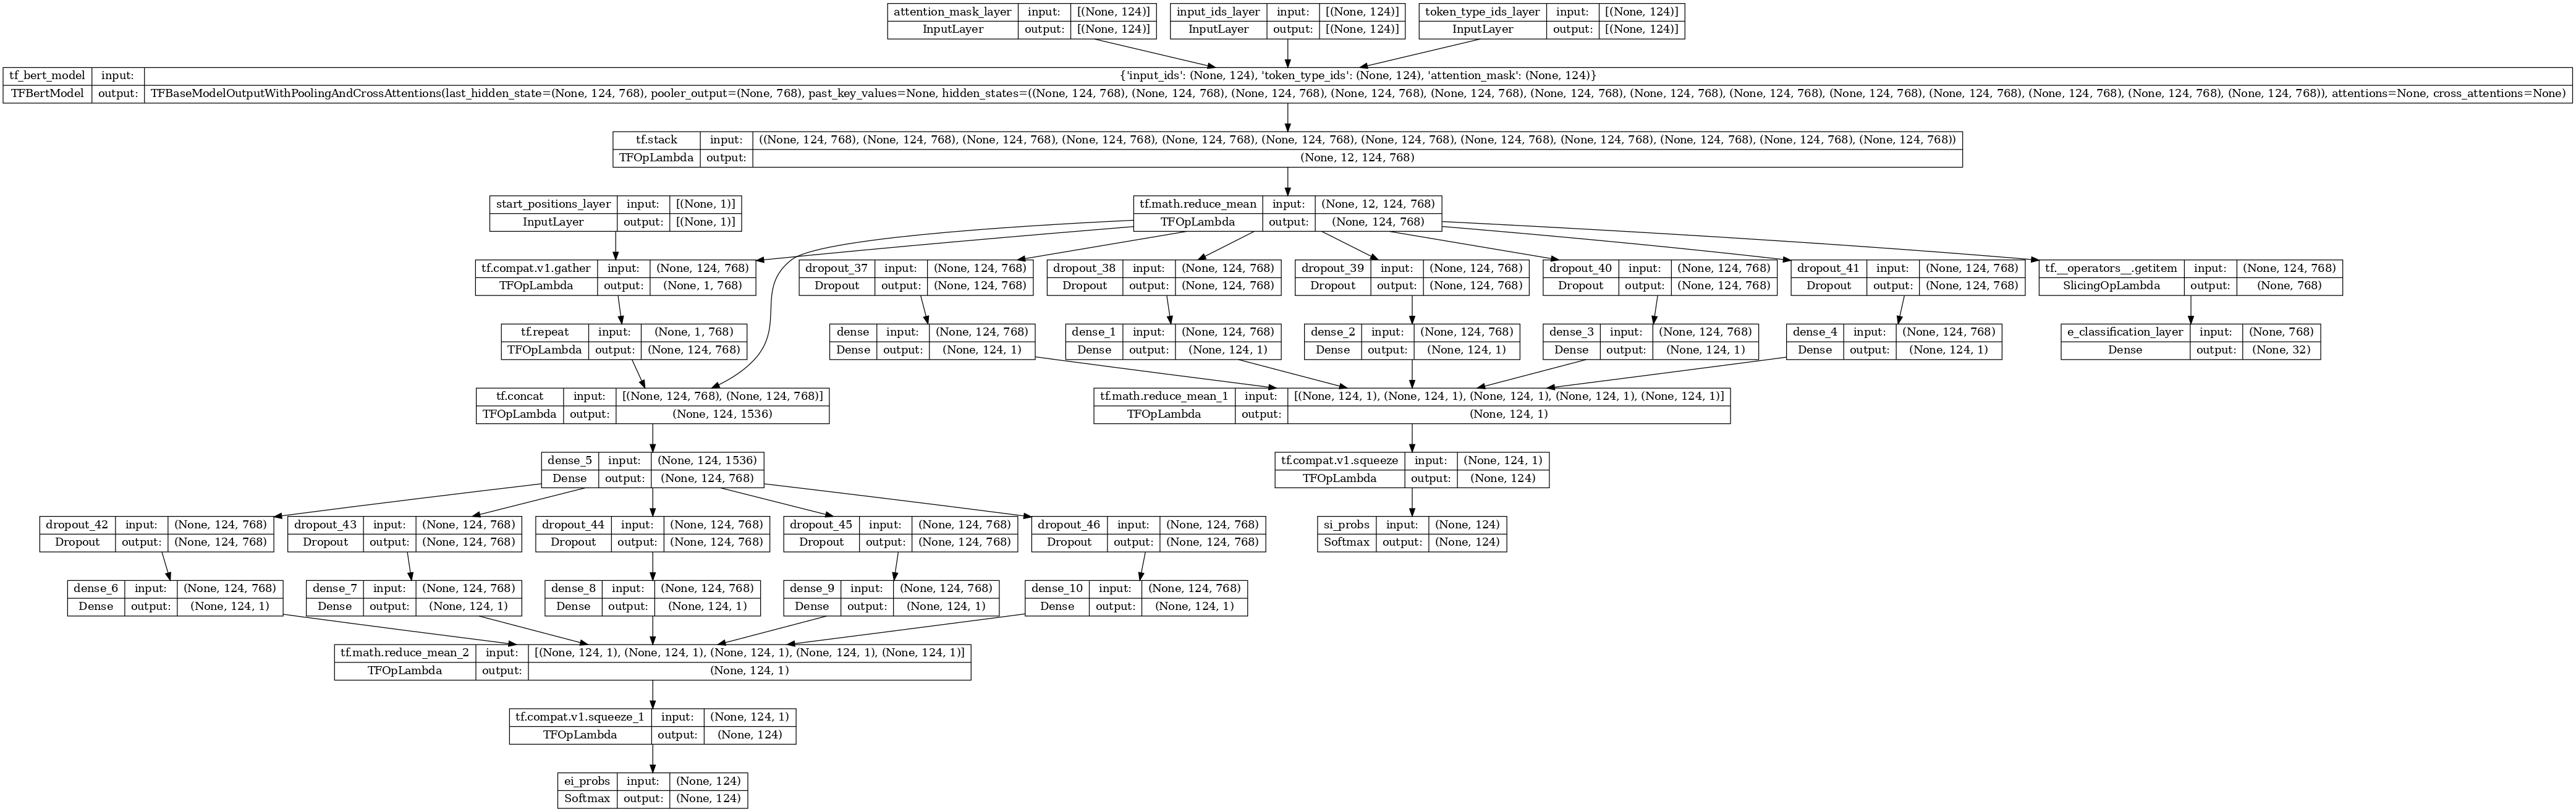

In [20]:
keras.utils.plot_model(ece_model, show_shapes=True, dpi=90)

## **Baseline a:** Bhat and Modi on Unaugmented EmoCause

In [20]:
ece_model = create_ece_model()

In [21]:
process_baseline = process_train_data(emocause_train_preprocessed)

ec_train_texts = process_baseline[0]
ec_train_e_labels = process_baseline[1]
ec_train_si_labels = process_baseline[2]
ec_train_ei_labels = process_baseline[3]
ec_train_encodings = process_baseline[4]

In [22]:
# # Implement early training termination by monitoring validation loss
# from tensorflow.keras.callbacks import EarlyStopping
# estop_class_valid_loss = EarlyStopping(monitor='val_e_classification_layer_loss', patience=5, restore_best_weights=True)
# estop_si_valid_loss = EarlyStopping(monitor='val_si_probs_loss', patience=5, restore_best_weights=True)
# estop_ei_valid_loss = EarlyStopping(monitor='val_ei_probs_loss', patience=5, restore_best_weights=True)

In [22]:
# Save model at each epoch
from keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath="./trained_models/EmoCause/Baseline/baseline_batch24_epoch{epoch}.keras", save_best_only=False)

In [23]:
ece_model_history = ece_model.fit([ec_train_encodings.input_ids, ec_train_encodings.token_type_ids, ec_train_encodings.attention_mask, ec_train_si_labels],
                                  [ec_train_e_labels, ec_train_si_labels, ec_train_ei_labels],
                                  validation_data=([ec_valid_encodings.input_ids, ec_valid_encodings.token_type_ids, ec_valid_encodings.attention_mask, ec_valid_si_labels],
                                                   [ec_valid_e_labels, ec_valid_si_labels, ec_valid_ei_labels]),
                                  batch_size=24,
                                  epochs=10,
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 1/10


/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


126/126 [==============================] - 47s 368ms/step - loss: 2.7222 - e_classification_layer_loss: 3.4692 - si_probs_loss: 2.0160 - ei_probs_loss: 1.9343 - e_classification_layer_accuracy: 0.0368 - si_probs_accuracy: 0.4166 - ei_probs_accuracy: 0.4149 - val_loss: 2.4728 - val_e_classification_layer_loss: 3.4631 - val_si_probs_loss: 1.4909 - val_ei_probs_loss: 1.4740 - val_e_classification_layer_accuracy: 0.0464 - val_si_probs_accuracy: 0.4993 - val_ei_probs_accuracy: 0.4887
Epoch 2/10
126/126 [==============================] - 45s 356ms/step - loss: 2.3708 - e_classification_layer_loss: 3.4293 - si_probs_loss: 1.3680 - ei_probs_loss: 1.2565 - e_classification_layer_accuracy: 0.0487 - si_probs_accuracy: 0.5361 - ei_probs_accuracy: 0.5613 - val_loss: 2.4322 - val_e_classification_layer_loss: 3.4211 - val_si_probs_loss: 1.4541 - val_ei_probs_loss: 1.4322 - val_e_classification_layer_accuracy: 0.0384 - val_si_probs_accuracy: 0.5219 - val_ei_probs_accuracy: 0.5258
Epoch 3/10
126/126 [=

In [29]:
for i in range(1, 11):
    model_path = f'./trained_models/EmoCause/Baseline/baseline_batch24_epoch{i}.keras'
    ece_model = tf.keras.models.load_model(model_path,
                                           custom_objects={"TFBertModel": spanbert_model})

    print(f'========== START VALID EVAL FOR MODEL EPOCH @ {i} ==========')
    run_valid_evaluation()
    print(f'========== END VALID EVAL FOR MODEL EPOCH @ {i} ==========')

    print(f'========== START TEST EVAL FOR MODEL EPOCH @ {i} ==========')
    run_test_evaluation()
    print(f'========== END TEST EVAL FOR MODEL EPOCH @ {i} ==========')

========== START VALID EVAL FOR MODEL EPOCH @ 1 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.0000    0.0000    0.0000        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.0000    0.0000    0.0000        34
__anticipating__     0.0000    0.0000    0.0000        29
     __anxious__     0.0000    0.0000    0.0000        21
__apprehensive__     0.0000    0.0000    0.0000        17
     __ashamed__     0.0000    0.0000    0.0000        14
      __caring__     0.0000    0.0000    0.0000        25
   __confident__     0.0000    0.0000    0.0000        31
     __content__     0.0000    0.0000    0.0000        32
  __devastated__     0.0000    0.0000    0.0000        24
__disappointed__     0.0000    0.0000    0.0000        21
   __disgusted__     0.0000    0.0000    0.0000        17
 __embarrassed__     0.0000    0.0000    0.0000        20
     __excited__

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

24/24 [==============================] - 2s 72ms/step
f1_score: 0.5820108045856108
========== END VALID EVAL FOR MODEL EPOCH @ 1 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 1 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.0000    0.0000    0.0000        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.0000    0.0000    0.0000        32
__anticipating__     0.0000    0.0000    0.0000        20
     __anxious__     0.0000    0.0000    0.0000        22
__apprehensive__     0.0000    0.0000    0.0000        24
     __ashamed__     0.0000    0.0000    0.0000        22
      __caring__     0.0000    0.0000    0.0000        27
   __confident__     0.0000    0.0000    0.0000        21
     __content__     0.0000    0.0000    0.0000        20
  __devastated__     0.0000    0.0000    0.0000        23
__disappointed__     0.0000    0.0000    0.0000    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

27/27 [==============================] - 2s 75ms/step
f1_score: 0.0
========== END TEST EVAL FOR MODEL EPOCH @ 1 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 2 ==========
24/24 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.0000    0.0000    0.0000        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.0000    0.0000    0.0000        34
__anticipating__     0.0000    0.0000    0.0000        29
     __anxious__     0.0000    0.0000    0.0000        21
__apprehensive__     0.0000    0.0000    0.0000        17
     __ashamed__     0.0000    0.0000    0.0000        14
      __caring__     0.0000    0.0000    0.0000        25
   __confident__     0.0000    0.0000    0.0000        31
     __content__     0.0000    0.0000    0.0000        32
  __devastated__     0.0000    0.0000    0.0000        24
__disappointed__     0.0000    0.0000    0.0000        21
   __dis

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

24/24 [==============================] - 2s 70ms/step
f1_score: 0.6083539220269818
========== END VALID EVAL FOR MODEL EPOCH @ 2 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 2 ==========
27/27 [==============================] - 2s 70ms/step
                  precision    recall  f1-score   support

      __afraid__     0.0000    0.0000    0.0000        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.0000    0.0000    0.0000        32
__anticipating__     0.0000    0.0000    0.0000        20
     __anxious__     0.0000    0.0000    0.0000        22
__apprehensive__     0.0000    0.0000    0.0000        24
     __ashamed__     0.0000    0.0000    0.0000        22
      __caring__     0.0000    0.0000    0.0000        27
   __confident__     0.0000    0.0000    0.0000        21
     __content__     0.0000    0.0000    0.0000        20
  __devastated__     0.0000    0.0000    0.0000        23
__disappointed__     0.0000    0.0000    0.0000    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

27/27 [==============================] - 2s 70ms/step
f1_score: 0.0
========== END TEST EVAL FOR MODEL EPOCH @ 2 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 3 ==========
24/24 [==============================] - 2s 70ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3125    0.2083    0.2500        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.0000    0.0000    0.0000        34
__anticipating__     0.0000    0.0000    0.0000        29
     __anxious__     0.0000    0.0000    0.0000        21
__apprehensive__     0.0000    0.0000    0.0000        17
     __ashamed__     0.0000    0.0000    0.0000        14
      __caring__     0.0000    0.0000    0.0000        25
   __confident__     0.0000    0.0000    0.0000        31
     __content__     0.0000    0.0000    0.0000        32
  __devastated__     0.0000    0.0000    0.0000        24
__disappointed__     0.0000    0.0000    0.0000        21
   __dis

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

24/24 [==============================] - 2s 74ms/step
f1_score: 0.5952771767050069
========== END VALID EVAL FOR MODEL EPOCH @ 3 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 3 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.0000    0.0000    0.0000        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.0000    0.0000    0.0000        32
__anticipating__     0.0000    0.0000    0.0000        20
     __anxious__     0.0000    0.0000    0.0000        22
__apprehensive__     0.0000    0.0000    0.0000        24
     __ashamed__     0.0000    0.0000    0.0000        22
      __caring__     0.0000    0.0000    0.0000        27
   __confident__     0.0000    0.0000    0.0000        21
     __content__     0.0000    0.0000    0.0000        20
  __devastated__     0.0000    0.0000    0.0000        23
__disappointed__     0.0000    0.0000    0.0000    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

27/27 [==============================] - 2s 73ms/step
f1_score: 0.5889801206895084
========== END TEST EVAL FOR MODEL EPOCH @ 3 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 4 ==========
24/24 [==============================] - 2s 71ms/step
                  precision    recall  f1-score   support

      __afraid__     0.1707    0.5833    0.2642        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.2632    0.1471    0.1887        34
__anticipating__     0.3333    0.0690    0.1143        29
     __anxious__     0.1667    0.2381    0.1961        21
__apprehensive__     0.3000    0.5294    0.3830        17
     __ashamed__     0.0000    0.0000    0.0000        14
      __caring__     0.0000    0.0000    0.0000        25
   __confident__     0.4286    0.0968    0.1579        31
     __content__     0.3462    0.2812    0.3103        32
  __devastated__     0.0000    0.0000    0.0000        24
__disappointed__     0.5000    0.0476    0.0870    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

24/24 [==============================] - 2s 70ms/step
f1_score: 0.5841672070502673
========== END VALID EVAL FOR MODEL EPOCH @ 4 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 4 ==========
27/27 [==============================] - 2s 71ms/step
                  precision    recall  f1-score   support

      __afraid__     0.1481    0.7059    0.2449        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.2143    0.1875    0.2000        32
__anticipating__     0.2857    0.2000    0.2353        20
     __anxious__     0.1667    0.0909    0.1176        22
__apprehensive__     0.4545    0.6250    0.5263        24
     __ashamed__     0.5000    0.0909    0.1538        22
      __caring__     0.0000    0.0000    0.0000        27
   __confident__     0.5000    0.1905    0.2759        21
     __content__     0.2162    0.4000    0.2807        20
  __devastated__     0.0000    0.0000    0.0000        23
__disappointed__     0.5000    0.0345    0.0645    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

27/27 [==============================] - 2s 70ms/step
f1_score: 0.0
========== END TEST EVAL FOR MODEL EPOCH @ 4 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 5 ==========
24/24 [==============================] - 2s 71ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3750    0.5000    0.4286        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4828    0.4118    0.4444        34
__anticipating__     0.7143    0.1724    0.2778        29
     __anxious__     0.3333    0.4286    0.3750        21
__apprehensive__     0.5000    0.0588    0.1053        17
     __ashamed__     0.2381    0.3571    0.2857        14
      __caring__     0.7500    0.1200    0.2069        25
   __confident__     0.3929    0.3548    0.3729        31
     __content__     0.5600    0.4375    0.4912        32
  __devastated__     0.5000    0.2917    0.3684        24
__disappointed__     0.1818    0.0952    0.1250        21
   __dis

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

24/24 [==============================] - 2s 75ms/step
f1_score: 0.5635476157116018
========== END VALID EVAL FOR MODEL EPOCH @ 5 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 5 ==========
27/27 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.2439    0.5882    0.3448        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.3333    0.3750    0.3529        32
__anticipating__     0.1667    0.1000    0.1250        20
     __anxious__     0.3478    0.3636    0.3556        22
__apprehensive__     0.2857    0.0833    0.1290        24
     __ashamed__     0.2632    0.2273    0.2439        22
      __caring__     0.2857    0.0741    0.1176        27
   __confident__     0.2727    0.2857    0.2791        21
     __content__     0.6000    0.6000    0.6000        20
  __devastated__     0.5556    0.2174    0.3125        23
__disappointed__     0.2857    0.1379    0.1860    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

27/27 [==============================] - 2s 79ms/step
f1_score: 0.5516152217436552
========== END TEST EVAL FOR MODEL EPOCH @ 5 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 6 ==========
24/24 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.2679    0.6250    0.3750        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4400    0.3235    0.3729        34
__anticipating__     0.5000    0.3103    0.3830        29
     __anxious__     0.2432    0.4286    0.3103        21
__apprehensive__     0.1111    0.1176    0.1143        17
     __ashamed__     0.3333    0.1429    0.2000        14
      __caring__     0.6364    0.2800    0.3889        25
   __confident__     0.5000    0.4194    0.4561        31
     __content__     0.5278    0.5938    0.5588        32
  __devastated__     0.0000    0.0000    0.0000        24
__disappointed__     0.2667    0.3810    0.3137    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

24/24 [==============================] - 2s 76ms/step
f1_score: 0.587735700121153
========== END VALID EVAL FOR MODEL EPOCH @ 6 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 6 ==========
27/27 [==============================] - 2s 77ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3000    0.8824    0.4478        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.5185    0.4375    0.4746        32
__anticipating__     0.3000    0.3000    0.3000        20
     __anxious__     0.3529    0.5455    0.4286        22
__apprehensive__     0.3704    0.4167    0.3922        24
     __ashamed__     0.7500    0.1364    0.2308        22
      __caring__     0.6875    0.4074    0.5116        27
   __confident__     0.3636    0.3810    0.3721        21
     __content__     0.4000    0.7000    0.5091        20
  __devastated__     1.0000    0.0435    0.0833        23
__disappointed__     0.3023    0.4483    0.3611     

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 73ms/step
f1_score: 0.0
========== END TEST EVAL FOR MODEL EPOCH @ 6 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 7 ==========
24/24 [==============================] - 2s 76ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3409    0.6250    0.4412        24
       __angry__     0.1250    0.0357    0.0556        28
     __annoyed__     0.3750    0.4412    0.4054        34
__anticipating__     0.4583    0.3793    0.4151        29
     __anxious__     0.2857    0.2857    0.2857        21
__apprehensive__     0.4167    0.2941    0.3448        17
     __ashamed__     0.1786    0.3571    0.2381        14
      __caring__     0.4545    0.4000    0.4255        25
   __confident__     0.5417    0.4194    0.4727        31
     __content__     0.6667    0.4375    0.5283        32
  __devastated__     0.5312    0.7083    0.6071        24
__disappointed__     0.3913    0.4286    0.4091        21
   __dis

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

24/24 [==============================] - 2s 72ms/step
f1_score: 0.5816745073245055
========== END VALID EVAL FOR MODEL EPOCH @ 7 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 7 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3000    0.7059    0.4211        17
       __angry__     0.2857    0.0714    0.1143        28
     __annoyed__     0.3860    0.6875    0.4944        32
__anticipating__     0.3182    0.3500    0.3333        20
     __anxious__     0.3684    0.3182    0.3415        22
__apprehensive__     0.3929    0.4583    0.4231        24
     __ashamed__     0.3043    0.3182    0.3111        22
      __caring__     0.6667    0.5185    0.5833        27
   __confident__     0.3333    0.4762    0.3922        21
     __content__     0.6250    0.5000    0.5556        20
  __devastated__     0.5000    0.7391    0.5965        23
__disappointed__     0.3667    0.3793    0.3729    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 77ms/step
f1_score: 0.6008745284957062
========== END TEST EVAL FOR MODEL EPOCH @ 7 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 8 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3810    0.3333    0.3556        24
       __angry__     0.5000    0.0714    0.1250        28
     __annoyed__     0.3947    0.4412    0.4167        34
__anticipating__     0.5652    0.4483    0.5000        29
     __anxious__     0.2903    0.4286    0.3462        21
__apprehensive__     0.2143    0.1765    0.1935        17
     __ashamed__     0.2353    0.2857    0.2581        14
      __caring__     0.6316    0.4800    0.5455        25
   __confident__     0.4667    0.4516    0.4590        31
     __content__     0.6129    0.5938    0.6032        32
  __devastated__     0.5517    0.6667    0.6038        24
__disappointed__     0.2593    0.3333    0.2917    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 77ms/step
f1_score: 0.5794537436071932
========== END VALID EVAL FOR MODEL EPOCH @ 8 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 8 ==========
27/27 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4000    0.5882    0.4762        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4151    0.6875    0.5176        32
__anticipating__     0.3500    0.3500    0.3500        20
     __anxious__     0.3143    0.5000    0.3860        22
__apprehensive__     0.5385    0.2917    0.3784        24
     __ashamed__     0.1875    0.1364    0.1579        22
      __caring__     0.8421    0.5926    0.6957        27
   __confident__     0.3667    0.5238    0.4314        21
     __content__     0.4138    0.6000    0.4898        20
  __devastated__     0.5484    0.7391    0.6296        23
__disappointed__     0.3000    0.4138    0.3478    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 75ms/step
f1_score: 0.5888721000767587
========== END TEST EVAL FOR MODEL EPOCH @ 8 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 9 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4231    0.4583    0.4400        24
       __angry__     0.1667    0.0714    0.1000        28
     __annoyed__     0.5833    0.4118    0.4828        34
__anticipating__     0.6000    0.3103    0.4091        29
     __anxious__     0.3077    0.3810    0.3404        21
__apprehensive__     0.2500    0.1176    0.1600        17
     __ashamed__     0.1000    0.0714    0.0833        14
      __caring__     0.5909    0.5200    0.5532        25
   __confident__     0.6190    0.4194    0.5000        31
     __content__     0.8000    0.3750    0.5106        32
  __devastated__     0.4615    0.5000    0.4800        24
__disappointed__     0.4667    0.3333    0.3889    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 75ms/step
f1_score: 0.5847405616216232
========== END VALID EVAL FOR MODEL EPOCH @ 9 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 9 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.2778    0.2941    0.2857        17
       __angry__     0.2857    0.0714    0.1143        28
     __annoyed__     0.5152    0.5312    0.5231        32
__anticipating__     0.5333    0.4000    0.4571        20
     __anxious__     0.3448    0.4545    0.3922        22
__apprehensive__     0.6154    0.3333    0.4324        24
     __ashamed__     0.1176    0.0909    0.1026        22
      __caring__     0.5769    0.5556    0.5660        27
   __confident__     0.4706    0.3810    0.4211        21
     __content__     0.7143    0.5000    0.5882        20
  __devastated__     0.4054    0.6522    0.5000        23
__disappointed__     0.3846    0.3448    0.3636    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 74ms/step
f1_score: 0.5934896260435664
========== END TEST EVAL FOR MODEL EPOCH @ 9 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 10 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3684    0.2917    0.3256        24
       __angry__     0.0625    0.0357    0.0455        28
     __annoyed__     0.4375    0.2059    0.2800        34
__anticipating__     0.4762    0.3448    0.4000        29
     __anxious__     0.3889    0.3333    0.3590        21
__apprehensive__     0.5000    0.1765    0.2609        17
     __ashamed__     0.0000    0.0000    0.0000        14
      __caring__     0.5263    0.4000    0.4545        25
   __confident__     0.6316    0.3871    0.4800        31
     __content__     0.4750    0.5938    0.5278        32
  __devastated__     0.5000    0.2917    0.3684        24
__disappointed__     0.4000    0.2857    0.3333   

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 75ms/step
f1_score: 0.0
========== END VALID EVAL FOR MODEL EPOCH @ 10 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 10 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3182    0.4118    0.3590        17
       __angry__     0.2632    0.1786    0.2128        28
     __annoyed__     0.4412    0.4688    0.4545        32
__anticipating__     0.5000    0.5500    0.5238        20
     __anxious__     0.4706    0.3636    0.4103        22
__apprehensive__     0.8889    0.3333    0.4848        24
     __ashamed__     0.2500    0.0909    0.1333        22
      __caring__     0.6000    0.5556    0.5769        27
   __confident__     0.4118    0.3333    0.3684        21
     __content__     0.3889    0.7000    0.5000        20
  __devastated__     0.5882    0.4348    0.5000        23
__disappointed__     0.3600    0.3103    0.3333        29
   __d

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 75ms/step
f1_score: 0.5754492790966073
========== END TEST EVAL FOR MODEL EPOCH @ 10 ==========


### Baseline Model Achieves highest performance @ 9 epochs

```
========== START VALID EVAL FOR MODEL EPOCH @ 9 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4231    0.4583    0.4400        24
       __angry__     0.1667    0.0714    0.1000        28
     __annoyed__     0.5833    0.4118    0.4828        34
__anticipating__     0.6000    0.3103    0.4091        29
     __anxious__     0.3077    0.3810    0.3404        21
__apprehensive__     0.2500    0.1176    0.1600        17
     __ashamed__     0.1000    0.0714    0.0833        14
      __caring__     0.5909    0.5200    0.5532        25
   __confident__     0.6190    0.4194    0.5000        31
     __content__     0.8000    0.3750    0.5106        32
  __devastated__     0.4615    0.5000    0.4800        24
__disappointed__     0.4667    0.3333    0.3889        21
   __disgusted__     0.6000    0.5294    0.5625        17
 __embarrassed__     0.4828    0.7000    0.5714        20
     __excited__     0.3333    0.6667    0.4444        30
    __faithful__     0.3333    0.1000    0.1538        10
     __furious__     0.3333    0.5000    0.4000        24
    __grateful__     0.4138    0.6667    0.5106        18
      __guilty__     0.6000    0.5625    0.5806        32
     __hopeful__     0.5714    0.5000    0.5333        24
   __impressed__     0.5217    0.5217    0.5217        23
     __jealous__     0.3889    0.4667    0.4242        15
      __joyful__     0.1935    0.3750    0.2553        16
      __lonely__     0.6552    0.6552    0.6552        29
   __nostalgic__     0.5882    0.5263    0.5556        19
    __prepared__     0.6429    0.3600    0.4615        25
       __proud__     0.6667    0.2727    0.3871        22
         __sad__     0.3333    0.3333    0.3333        33
 __sentimental__     0.4074    0.5789    0.4783        19
   __surprised__     0.3188    0.6286    0.4231        35
   __terrified__     0.4483    0.5200    0.4815        25
    __trusting__     0.6154    0.4211    0.5000        19

        accuracy                         0.4450       755
       macro avg     0.4630    0.4329    0.4276       755
    weighted avg     0.4779    0.4450    0.4405       755

 2/24 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
24/24 [==============================] - 2s 75ms/step
24/24 [==============================] - 2s 74ms/step
24/24 [==============================] - 2s 74ms/step
24/24 [==============================] - 2s 75ms/step
f1_score: 0.5847405616216232
========== END VALID EVAL FOR MODEL EPOCH @ 9 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 9 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.2778    0.2941    0.2857        17
       __angry__     0.2857    0.0714    0.1143        28
     __annoyed__     0.5152    0.5312    0.5231        32
__anticipating__     0.5333    0.4000    0.4571        20
     __anxious__     0.3448    0.4545    0.3922        22
__apprehensive__     0.6154    0.3333    0.4324        24
     __ashamed__     0.1176    0.0909    0.1026        22
      __caring__     0.5769    0.5556    0.5660        27
   __confident__     0.4706    0.3810    0.4211        21
     __content__     0.7143    0.5000    0.5882        20
  __devastated__     0.4054    0.6522    0.5000        23
__disappointed__     0.3846    0.3448    0.3636        29
   __disgusted__     0.6818    0.5556    0.6122        27
 __embarrassed__     0.3871    0.3750    0.3810        32
     __excited__     0.3462    0.6000    0.4390        30
    __faithful__     1.0000    0.3684    0.5385        19
     __furious__     0.1905    0.2353    0.2105        17
    __grateful__     0.7222    0.6667    0.6933        39
      __guilty__     0.5000    0.4667    0.4828        30
     __hopeful__     0.4348    0.3846    0.4082        26
   __impressed__     0.3939    0.5909    0.4727        22
     __jealous__     0.5714    0.6061    0.5882        33
      __joyful__     0.4444    0.3529    0.3934        34
      __lonely__     0.7917    0.7917    0.7917        24
   __nostalgic__     0.6000    0.6250    0.6122        24
    __prepared__     0.9091    0.4000    0.5556        25
       __proud__     0.5556    0.4167    0.4762        36
         __sad__     0.3030    0.4348    0.3571        23
 __sentimental__     0.5185    0.4828    0.5000        29
   __surprised__     0.3625    0.6304    0.4603        46
   __terrified__     0.3793    0.5000    0.4314        22
    __trusting__     0.2667    0.2667    0.2667        15

        accuracy                         0.4630       838
       macro avg     0.4875    0.4487    0.4505       838
    weighted avg     0.4925    0.4630    0.4609       838

 2/27 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
27/27 [==============================] - 2s 75ms/step
27/27 [==============================] - 2s 75ms/step
27/27 [==============================] - 2s 75ms/step
27/27 [==============================] - 2s 74ms/step
f1_score: 0.5934896260435664
========== END TEST EVAL FOR MODEL EPOCH @ 9 ==========
```

### **Brief Sanity Check:** Does Model Output Spans that are Better than Simply Just Taking the Whole Sentence?

In [19]:
emocause_train_preprocessed['emotion'].value_counts()

emotion
__surprised__       152
__annoyed__         114
__impressed__       111
__sentimental__     109
__sad__             107
__excited__         107
__embarrassed__     104
__disgusted__       104
__proud__           102
__jealous__         102
__afraid__          100
__nostalgic__        99
__disappointed__     96
__terrified__        94
__prepared__         93
__angry__            92
__anxious__          92
__joyful__           91
__lonely__           91
__grateful__         90
__confident__        89
__ashamed__          88
__furious__          88
__content__          88
__caring__           85
__hopeful__          84
__apprehensive__     83
__anticipating__     81
__trusting__         79
__devastated__       77
__guilty__           69
__faithful__         59
Name: count, dtype: int64

#### Generate F1 score on test set for naive model that always predicts the majority class in the train set

In [22]:
label_to_key = {'__surprised__': 29, '__guilty__': 18, '__terrified__': 30, '__proud__': 26, '__grateful__': 17, '__afraid__': 0,
 '__furious__': 16, '__disgusted__': 12, '__joyful__': 22, '__prepared__': 25, '__ashamed__': 6, '__anxious__': 4,
 '__trusting__': 31, '__embarrassed__': 13, '__annoyed__': 2, '__excited__': 14, '__nostalgic__': 24,
 '__disappointed__': 11, '__confident__': 8, '__faithful__': 15, '__sad__': 27, '__caring__': 7, '__devastated__': 10,
 '__apprehensive__': 5, '__sentimental__': 28, '__jealous__': 21, '__content__': 9, '__lonely__': 23,
 '__impressed__': 20, '__angry__': 1, '__anticipating__': 3, '__hopeful__': 19}


In [39]:
majority_class = '__surprised__'
label = label_to_key[majority_class]
naive_labels = np.array([label] * len(ec_test_e_labels))
naive_labels

array([29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29

In [48]:
print(classification_report(ec_test_e_labels, 
                      naive_labels, 
                      target_names=target_names, 
                      digits=4))

                  precision    recall  f1-score   support

      __afraid__     0.0000    0.0000    0.0000        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.0000    0.0000    0.0000        32
__anticipating__     0.0000    0.0000    0.0000        20
     __anxious__     0.0000    0.0000    0.0000        22
__apprehensive__     0.0000    0.0000    0.0000        24
     __ashamed__     0.0000    0.0000    0.0000        22
      __caring__     0.0000    0.0000    0.0000        27
   __confident__     0.0000    0.0000    0.0000        21
     __content__     0.0000    0.0000    0.0000        20
  __devastated__     0.0000    0.0000    0.0000        23
__disappointed__     0.0000    0.0000    0.0000        29
   __disgusted__     0.0000    0.0000    0.0000        27
 __embarrassed__     0.0000    0.0000    0.0000        32
     __excited__     0.0000    0.0000    0.0000        30
    __faithful__     0.0000    0.0000    0.0000        19
     __furiou

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Generate F1 score on test set for naive model that predicts the entire sentence always

In [34]:
end_of_sit = [np.argmax(i == 0) - 1 for i in ec_test_encodings.input_ids]
for i in range(len(end_of_sit)):
  if end_of_sit[i] == -1:
    end_of_sit[i] = 123
zeros = list(np.zeros(len(end_of_sit)))
zeros = [int(i) for i in zeros]

In [35]:
compute_f1_score(zeros, end_of_sit, ec_test_si_labels, ec_test_ei_labels)

0.610157907955239

## **Experiment 1:** Bhat and Modi on EmoCause Augmented to 20,000 via Random Token Swap with Top Cosine Similarity Token, Balancing Classes

In [32]:
del ece_model

In [33]:
emocause_augment2_preprocessed = pd.read_csv(f'{AUGMENT_PATH}/augment_2_emocause_r_balanced.csv')

In [34]:
process_augment_2 = process_train_data(emocause_augment2_preprocessed)

In [35]:
ec_train_texts = process_augment_2[0]
ec_train_e_labels = process_augment_2[1]
ec_train_si_labels = process_augment_2[2]
ec_train_ei_labels = process_augment_2[3]
ec_train_encodings = process_augment_2[4]

In [36]:
ece_model = create_ece_model()

In [37]:
# Save model at each epoch
from keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath="./trained_models/EmoCause/AugmentRandomSwap/augment_random_swap_batch24_epoch{epoch}.keras", save_best_only=False)

In [39]:
ece_model_history = ece_model.fit([ec_train_encodings.input_ids, ec_train_encodings.token_type_ids, ec_train_encodings.attention_mask, ec_train_si_labels],
                                  [ec_train_e_labels, ec_train_si_labels, ec_train_ei_labels],
                                  validation_data=([ec_valid_encodings.input_ids, ec_valid_encodings.token_type_ids, ec_valid_encodings.attention_mask, ec_valid_si_labels],
                                                   [ec_valid_e_labels, ec_valid_si_labels, ec_valid_ei_labels]),
                                  batch_size=24,
                                  epochs=15,
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 1/15


/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


834/834 [==============================] - 284s 340ms/step - loss: 0.7838 - e_classification_layer_loss: 1.0548 - si_probs_loss: 0.5634 - ei_probs_loss: 0.4624 - e_classification_layer_accuracy: 0.7910 - si_probs_accuracy: 0.8766 - ei_probs_accuracy: 0.8955 - val_loss: 2.2390 - val_e_classification_layer_loss: 2.2039 - val_si_probs_loss: 2.4408 - val_ei_probs_loss: 2.1074 - val_e_classification_layer_accuracy: 0.4570 - val_si_probs_accuracy: 0.4834 - val_ei_probs_accuracy: 0.5073
Epoch 2/15
834/834 [==============================] - 282s 338ms/step - loss: 0.2585 - e_classification_layer_loss: 0.3204 - si_probs_loss: 0.1993 - ei_probs_loss: 0.1937 - e_classification_layer_accuracy: 0.9256 - si_probs_accuracy: 0.9497 - ei_probs_accuracy: 0.9514 - val_loss: 2.6378 - val_e_classification_layer_loss: 2.4300 - val_si_probs_loss: 2.8863 - val_ei_probs_loss: 2.8048 - val_e_classification_layer_accuracy: 0.4490 - val_si_probs_accuracy: 0.4821 - val_ei_probs_accuracy: 0.5139
Epoch 3/15
834/834 

KeyboardInterrupt: 

#### Run evaluations on all checkpoints of the model

In [41]:
for i in range(1, 15):
    model_path = f'./trained_models/EmoCause/AugmentInsertDelete/augment_insert_delete_batch24_epoch{i}.keras'
    ece_model = tf.keras.models.load_model(model_path,
                                           custom_objects={"TFBertModel": spanbert_model})

    print(f'========== START VALID EVAL FOR MODEL EPOCH @ {i} ==========')
    run_valid_evaluation()
    print(f'========== END VALID EVAL FOR MODEL EPOCH @ {i} ==========')

    print(f'========== START TEST EVAL FOR MODEL EPOCH @ {i} ==========')
    run_test_evaluation()
    print(f'========== END TEST EVAL FOR MODEL EPOCH @ {i} ==========')

========== START VALID EVAL FOR MODEL EPOCH @ 1 ==========
24/24 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4000    0.5000    0.4444        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4286    0.2647    0.3273        34
__anticipating__     0.3810    0.2759    0.3200        29
     __anxious__     0.3750    0.2857    0.3243        21
__apprehensive__     0.1905    0.2353    0.2105        17
     __ashamed__     0.2000    0.1429    0.1667        14
      __caring__     0.5652    0.5200    0.5417        25
   __confident__     0.5217    0.3871    0.4444        31
     __content__     0.5833    0.4375    0.5000        32
  __devastated__     0.5000    0.5000    0.5000        24
__disappointed__     0.4000    0.1905    0.2581        21
   __disgusted__     0.3871    0.7059    0.5000        17
 __embarrassed__     0.3704    0.5000    0.4255        20
     __excited__

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 74ms/step
f1_score: 0.5812043166848887
========== END VALID EVAL FOR MODEL EPOCH @ 1 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 1 ==========
27/27 [==============================] - 2s 76ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3478    0.4706    0.4000        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4815    0.4062    0.4407        32
__anticipating__     0.3810    0.4000    0.3902        20
     __anxious__     0.4706    0.3636    0.4103        22
__apprehensive__     0.4375    0.2917    0.3500        24
     __ashamed__     0.1250    0.0455    0.0667        22
      __caring__     0.5135    0.7037    0.5938        27
   __confident__     0.4074    0.5238    0.4583        21
     __content__     0.4737    0.4500    0.4615        20
  __devastated__     0.5909    0.5652    0.5778        23
__disappointed__     0.5000    0.3448    0.4082    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

27/27 [==============================] - 2s 71ms/step
f1_score: 0.5912958670338058
========== END TEST EVAL FOR MODEL EPOCH @ 1 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 2 ==========
24/24 [==============================] - 2s 76ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3947    0.6250    0.4839        24
       __angry__     0.1250    0.0357    0.0556        28
     __annoyed__     0.4516    0.4118    0.4308        34
__anticipating__     0.5294    0.3103    0.3913        29
     __anxious__     0.4500    0.4286    0.4390        21
__apprehensive__     0.2174    0.2941    0.2500        17
     __ashamed__     0.3750    0.2143    0.2727        14
      __caring__     0.7000    0.5600    0.6222        25
   __confident__     0.4474    0.5484    0.4928        31
     __content__     0.5926    0.5000    0.5424        32
  __devastated__     0.3846    0.2083    0.2703        24
__disappointed__     0.3600    0.4286    0.3913    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.5712820310588528
========== END VALID EVAL FOR MODEL EPOCH @ 2 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 2 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3333    0.6471    0.4400        17
       __angry__     0.2000    0.0357    0.0606        28
     __annoyed__     0.5312    0.5312    0.5312        32
__anticipating__     0.2800    0.3500    0.3111        20
     __anxious__     0.3462    0.4091    0.3750        22
__apprehensive__     0.5455    0.5000    0.5217        24
     __ashamed__     0.2500    0.1364    0.1765        22
      __caring__     0.7273    0.5926    0.6531        27
   __confident__     0.3235    0.5238    0.4000        21
     __content__     0.6000    0.6000    0.6000        20
  __devastated__     0.5333    0.3478    0.4211        23
__disappointed__     0.4444    0.5517    0.4923    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 72ms/step
f1_score: 0.6116602771666791
========== END TEST EVAL FOR MODEL EPOCH @ 2 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 3 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4375    0.5833    0.5000        24
       __angry__     0.1765    0.1071    0.1333        28
     __annoyed__     0.3409    0.4412    0.3846        34
__anticipating__     0.6111    0.3793    0.4681        29
     __anxious__     0.4444    0.3810    0.4103        21
__apprehensive__     0.1250    0.0588    0.0800        17
     __ashamed__     0.2941    0.3571    0.3226        14
      __caring__     0.7222    0.5200    0.6047        25
   __confident__     0.5909    0.4194    0.4906        31
     __content__     0.4688    0.4688    0.4688        32
  __devastated__     0.3929    0.4583    0.4231        24
__disappointed__     0.4000    0.4762    0.4348    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.5898212114716478
========== END VALID EVAL FOR MODEL EPOCH @ 3 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 3 ==========
27/27 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3939    0.7647    0.5200        17
       __angry__     0.2000    0.1429    0.1667        28
     __annoyed__     0.4182    0.7188    0.5287        32
__anticipating__     0.4167    0.5000    0.4545        20
     __anxious__     0.3750    0.4091    0.3913        22
__apprehensive__     0.5455    0.2500    0.3429        24
     __ashamed__     0.2857    0.1818    0.2222        22
      __caring__     0.6667    0.7407    0.7018        27
   __confident__     0.5714    0.5714    0.5714        21
     __content__     0.5385    0.7000    0.6087        20
  __devastated__     0.3750    0.5217    0.4364        23
__disappointed__     0.4333    0.4483    0.4407    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 71ms/step
f1_score: 0.6050402051948329
========== END TEST EVAL FOR MODEL EPOCH @ 3 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 4 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5625    0.3750    0.4500        24
       __angry__     0.1053    0.0714    0.0851        28
     __annoyed__     0.3778    0.5000    0.4304        34
__anticipating__     0.5385    0.2414    0.3333        29
     __anxious__     0.4286    0.4286    0.4286        21
__apprehensive__     0.4545    0.2941    0.3571        17
     __ashamed__     0.3000    0.4286    0.3529        14
      __caring__     0.7059    0.4800    0.5714        25
   __confident__     0.5333    0.5161    0.5246        31
     __content__     0.6667    0.5000    0.5714        32
  __devastated__     0.4500    0.3750    0.4091        24
__disappointed__     0.4211    0.3810    0.4000    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 73ms/step
f1_score: 0.5656994597233334
========== END VALID EVAL FOR MODEL EPOCH @ 4 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 4 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3810    0.4706    0.4211        17
       __angry__     0.5000    0.2500    0.3333        28
     __annoyed__     0.3889    0.6562    0.4884        32
__anticipating__     0.4615    0.3000    0.3636        20
     __anxious__     0.3077    0.3636    0.3333        22
__apprehensive__     0.3333    0.1667    0.2222        24
     __ashamed__     0.3333    0.1818    0.2353        22
      __caring__     0.6250    0.3704    0.4651        27
   __confident__     0.5185    0.6667    0.5833        21
     __content__     0.5556    0.5000    0.5263        20
  __devastated__     0.4783    0.4783    0.4783        23
__disappointed__     0.4000    0.4138    0.4068    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 76ms/step
f1_score: 0.5788586195228725
========== END TEST EVAL FOR MODEL EPOCH @ 4 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 5 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5000    0.3333    0.4000        24
       __angry__     0.1818    0.1429    0.1600        28
     __annoyed__     0.4286    0.3529    0.3871        34
__anticipating__     0.6000    0.2069    0.3077        29
     __anxious__     0.4375    0.3333    0.3784        21
__apprehensive__     0.3000    0.3529    0.3243        17
     __ashamed__     0.2000    0.2857    0.2353        14
      __caring__     0.5000    0.7200    0.5902        25
   __confident__     0.3684    0.6774    0.4773        31
     __content__     0.8000    0.3750    0.5106        32
  __devastated__     0.3030    0.4167    0.3509        24
__disappointed__     0.3684    0.3333    0.3500    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 77ms/step
f1_score: 0.5720423907265585
========== END VALID EVAL FOR MODEL EPOCH @ 5 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 5 ==========
27/27 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.2857    0.2353    0.2581        17
       __angry__     0.1724    0.1786    0.1754        28
     __annoyed__     0.5278    0.5938    0.5588        32
__anticipating__     0.5000    0.2500    0.3333        20
     __anxious__     0.3750    0.2727    0.3158        22
__apprehensive__     0.4167    0.4167    0.4167        24
     __ashamed__     0.3846    0.2273    0.2857        22
      __caring__     0.4615    0.6667    0.5455        27
   __confident__     0.2712    0.7619    0.4000        21
     __content__     0.7143    0.5000    0.5882        20
  __devastated__     0.4359    0.7391    0.5484        23
__disappointed__     0.4062    0.4483    0.4262    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 72ms/step
f1_score: 0.5998359496489629
========== END TEST EVAL FOR MODEL EPOCH @ 5 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 6 ==========
24/24 [==============================] - 2s 71ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3659    0.6250    0.4615        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4828    0.4118    0.4444        34
__anticipating__     0.7778    0.2414    0.3684        29
     __anxious__     0.2963    0.3810    0.3333        21
__apprehensive__     0.3750    0.1765    0.2400        17
     __ashamed__     0.4286    0.4286    0.4286        14
      __caring__     0.7857    0.4400    0.5641        25
   __confident__     0.5000    0.6452    0.5634        31
     __content__     0.5652    0.4062    0.4727        32
  __devastated__     0.4286    0.3750    0.4000        24
__disappointed__     0.4286    0.4286    0.4286    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.5664587300529604
========== END VALID EVAL FOR MODEL EPOCH @ 6 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 6 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3333    0.7059    0.4528        17
       __angry__     0.3077    0.1429    0.1951        28
     __annoyed__     0.4595    0.5312    0.4928        32
__anticipating__     0.2941    0.2500    0.2703        20
     __anxious__     0.2963    0.3636    0.3265        22
__apprehensive__     0.4000    0.2500    0.3077        24
     __ashamed__     0.3333    0.3182    0.3256        22
      __caring__     0.8421    0.5926    0.6957        27
   __confident__     0.4286    0.7143    0.5357        21
     __content__     0.7059    0.6000    0.6486        20
  __devastated__     0.4545    0.4348    0.4444        23
__disappointed__     0.4815    0.4483    0.4643    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 74ms/step
f1_score: 0.5838739185025706
========== END TEST EVAL FOR MODEL EPOCH @ 6 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 7 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3704    0.4167    0.3922        24
       __angry__     0.1500    0.1071    0.1250        28
     __annoyed__     0.6667    0.1765    0.2791        34
__anticipating__     0.6471    0.3793    0.4783        29
     __anxious__     0.2778    0.4762    0.3509        21
__apprehensive__     0.3684    0.4118    0.3889        17
     __ashamed__     0.2632    0.3571    0.3030        14
      __caring__     0.7500    0.6000    0.6667        25
   __confident__     0.4412    0.4839    0.4615        31
     __content__     0.6429    0.5625    0.6000        32
  __devastated__     0.4211    0.3333    0.3721        24
__disappointed__     0.4000    0.4762    0.4348    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 73ms/step
f1_score: 0.55742380814371
========== END VALID EVAL FOR MODEL EPOCH @ 7 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 7 ==========
27/27 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3548    0.6471    0.4583        17
       __angry__     0.4000    0.2857    0.3333        28
     __annoyed__     0.8462    0.3438    0.4889        32
__anticipating__     0.3684    0.3500    0.3590        20
     __anxious__     0.2750    0.5000    0.3548        22
__apprehensive__     0.4444    0.3333    0.3810        24
     __ashamed__     0.4091    0.4091    0.4091        22
      __caring__     0.5882    0.7407    0.6557        27
   __confident__     0.3548    0.5238    0.4231        21
     __content__     0.6471    0.5500    0.5946        20
  __devastated__     0.4231    0.4783    0.4490        23
__disappointed__     0.3548    0.3793    0.3667      

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 73ms/step
f1_score: 0.5573066966044091
========== END TEST EVAL FOR MODEL EPOCH @ 7 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 8 ==========
24/24 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4074    0.4583    0.4314        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4359    0.5000    0.4658        34
__anticipating__     0.6667    0.2759    0.3902        29
     __anxious__     0.2917    0.3333    0.3111        21
__apprehensive__     0.2500    0.2941    0.2703        17
     __ashamed__     0.2500    0.2857    0.2667        14
      __caring__     0.6667    0.6400    0.6531        25
   __confident__     0.4524    0.6129    0.5205        31
     __content__     0.6552    0.5938    0.6230        32
  __devastated__     0.4167    0.2083    0.2778        24
__disappointed__     0.5000    0.4286    0.4615    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 73ms/step
f1_score: 0.5768168269772866
========== END VALID EVAL FOR MODEL EPOCH @ 8 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 8 ==========
27/27 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4583    0.6471    0.5366        17
       __angry__     0.2857    0.0714    0.1143        28
     __annoyed__     0.5116    0.6875    0.5867        32
__anticipating__     0.5385    0.3500    0.4242        20
     __anxious__     0.3143    0.5000    0.3860        22
__apprehensive__     0.3636    0.3333    0.3478        24
     __ashamed__     0.2083    0.2273    0.2174        22
      __caring__     0.5526    0.7778    0.6462        27
   __confident__     0.3684    0.6667    0.4746        21
     __content__     0.5455    0.6000    0.5714        20
  __devastated__     0.5625    0.3913    0.4615        23
__disappointed__     0.3929    0.3793    0.3860    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 73ms/step
f1_score: 0.5712217166466858
========== END TEST EVAL FOR MODEL EPOCH @ 8 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 9 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5926    0.6667    0.6275        24
       __angry__     0.1500    0.1071    0.1250        28
     __annoyed__     0.5263    0.2941    0.3774        34
__anticipating__     0.8000    0.2759    0.4103        29
     __anxious__     0.4545    0.2381    0.3125        21
__apprehensive__     0.2143    0.5294    0.3051        17
     __ashamed__     0.1739    0.2857    0.2162        14
      __caring__     0.7778    0.5600    0.6512        25
   __confident__     0.4286    0.4839    0.4545        31
     __content__     0.5806    0.5625    0.5714        32
  __devastated__     0.3913    0.3750    0.3830        24
__disappointed__     0.4211    0.3810    0.4000    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.5593589161009832
========== END VALID EVAL FOR MODEL EPOCH @ 9 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 9 ==========
27/27 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3333    0.5294    0.4091        17
       __angry__     0.3333    0.2143    0.2609        28
     __annoyed__     0.7059    0.3750    0.4898        32
__anticipating__     0.3333    0.3000    0.3158        20
     __anxious__     0.3500    0.3182    0.3333        22
__apprehensive__     0.3333    0.6667    0.4444        24
     __ashamed__     0.2800    0.3182    0.2979        22
      __caring__     0.6818    0.5556    0.6122        27
   __confident__     0.3846    0.4762    0.4255        21
     __content__     0.6316    0.6000    0.6154        20
  __devastated__     0.4583    0.4783    0.4681        23
__disappointed__     0.4118    0.4828    0.4444    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 73ms/step
f1_score: 0.5706088046482286
========== END TEST EVAL FOR MODEL EPOCH @ 9 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 10 ==========
24/24 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3396    0.7500    0.4675        24
       __angry__     0.1538    0.0714    0.0976        28
     __annoyed__     0.4091    0.5294    0.4615        34
__anticipating__     0.4800    0.4138    0.4444        29
     __anxious__     0.6154    0.3810    0.4706        21
__apprehensive__     0.2500    0.4118    0.3111        17
     __ashamed__     0.2857    0.2857    0.2857        14
      __caring__     0.7500    0.7200    0.7347        25
   __confident__     0.6154    0.5161    0.5614        31
     __content__     0.5263    0.6250    0.5714        32
  __devastated__     0.4000    0.1667    0.2353        24
__disappointed__     0.5333    0.3810    0.4444   

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.5756113860158371
========== END VALID EVAL FOR MODEL EPOCH @ 10 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 10 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3111    0.8235    0.4516        17
       __angry__     0.2500    0.1071    0.1500        28
     __annoyed__     0.4565    0.6562    0.5385        32
__anticipating__     0.3846    0.5000    0.4348        20
     __anxious__     0.3810    0.3636    0.3721        22
__apprehensive__     0.3333    0.5417    0.4127        24
     __ashamed__     0.2500    0.0909    0.1333        22
      __caring__     0.5526    0.7778    0.6462        27
   __confident__     0.4444    0.5714    0.5000        21
     __content__     0.4643    0.6500    0.5417        20
  __devastated__     0.7273    0.3478    0.4706        23
__disappointed__     0.3667    0.3793    0.3729  

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 74ms/step
f1_score: 0.5748034298934338
========== END TEST EVAL FOR MODEL EPOCH @ 10 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 11 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3846    0.2083    0.2703        24
       __angry__     0.0526    0.0357    0.0426        28
     __annoyed__     0.4500    0.2647    0.3333        34
__anticipating__     0.8000    0.2759    0.4103        29
     __anxious__     0.3684    0.3333    0.3500        21
__apprehensive__     0.3636    0.2353    0.2857        17
     __ashamed__     0.2941    0.3571    0.3226        14
      __caring__     0.6500    0.5200    0.5778        25
   __confident__     0.5172    0.4839    0.5000        31
     __content__     0.6667    0.5000    0.5714        32
  __devastated__     0.3143    0.4583    0.3729        24
__disappointed__     0.5000    0.4286    0.4615  

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 76ms/step
f1_score: 0.5749031192293695
========== END VALID EVAL FOR MODEL EPOCH @ 11 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 11 ==========
27/27 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4286    0.3529    0.3871        17
       __angry__     0.3571    0.1786    0.2381        28
     __annoyed__     0.7143    0.4688    0.5660        32
__anticipating__     0.4545    0.2500    0.3226        20
     __anxious__     0.3929    0.5000    0.4400        22
__apprehensive__     0.4444    0.3333    0.3810        24
     __ashamed__     0.3913    0.4091    0.4000        22
      __caring__     0.7222    0.4815    0.5778        27
   __confident__     0.4242    0.6667    0.5185        21
     __content__     0.6842    0.6500    0.6667        20
  __devastated__     0.3939    0.5652    0.4643        23
__disappointed__     0.5172    0.5172    0.5172  

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 72ms/step
f1_score: 0.575252009785169
========== END TEST EVAL FOR MODEL EPOCH @ 11 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 12 ==========
24/24 [==============================] - 2s 77ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3824    0.5417    0.4483        24
       __angry__     0.1875    0.2143    0.2000        28
     __annoyed__     0.3778    0.5000    0.4304        34
__anticipating__     0.7273    0.2759    0.4000        29
     __anxious__     0.3684    0.3333    0.3500        21
__apprehensive__     0.3333    0.2941    0.3125        17
     __ashamed__     0.2941    0.3571    0.3226        14
      __caring__     0.4783    0.4400    0.4583        25
   __confident__     0.5517    0.5161    0.5333        31
     __content__     0.5714    0.3750    0.4528        32
  __devastated__     0.3333    0.2917    0.3111        24
__disappointed__     0.3750    0.2857    0.3243   

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 75ms/step
f1_score: 0.5721904424479454
========== END VALID EVAL FOR MODEL EPOCH @ 12 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 12 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3438    0.6471    0.4490        17
       __angry__     0.4211    0.2857    0.3404        28
     __annoyed__     0.3958    0.5938    0.4750        32
__anticipating__     0.2778    0.2500    0.2632        20
     __anxious__     0.3600    0.4091    0.3830        22
__apprehensive__     0.3750    0.2500    0.3000        24
     __ashamed__     0.3684    0.3182    0.3415        22
      __caring__     0.5161    0.5926    0.5517        27
   __confident__     0.4062    0.6190    0.4906        21
     __content__     0.7059    0.6000    0.6486        20
  __devastated__     0.4444    0.5217    0.4800        23
__disappointed__     0.4783    0.3793    0.4231  

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 78ms/step
f1_score: 0.5790073377409345
========== END TEST EVAL FOR MODEL EPOCH @ 12 ==========


OSError: No file or directory found at ./trained_models/EmoCause/AugmentInsertDelete/augment_insert_delete_batch24_epoch13.keras

#### Best performing model is seen @ 3 epochs

```
========== START VALID EVAL FOR MODEL EPOCH @ 3 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4375    0.5833    0.5000        24
       __angry__     0.1765    0.1071    0.1333        28
     __annoyed__     0.3409    0.4412    0.3846        34
__anticipating__     0.6111    0.3793    0.4681        29
     __anxious__     0.4444    0.3810    0.4103        21
__apprehensive__     0.1250    0.0588    0.0800        17
     __ashamed__     0.2941    0.3571    0.3226        14
      __caring__     0.7222    0.5200    0.6047        25
   __confident__     0.5909    0.4194    0.4906        31
     __content__     0.4688    0.4688    0.4688        32
  __devastated__     0.3929    0.4583    0.4231        24
__disappointed__     0.4000    0.4762    0.4348        21
   __disgusted__     0.4545    0.5882    0.5128        17
 __embarrassed__     0.5833    0.7000    0.6364        20
     __excited__     0.3273    0.6000    0.4235        30
    __faithful__     0.3636    0.4000    0.3810        10
     __furious__     0.4000    0.4167    0.4082        24
    __grateful__     0.6875    0.6111    0.6471        18
      __guilty__     0.6000    0.2812    0.3830        32
     __hopeful__     0.5000    0.4583    0.4783        24
   __impressed__     0.7059    0.5217    0.6000        23
     __jealous__     0.5333    0.5333    0.5333        15
      __joyful__     0.1463    0.3750    0.2105        16
      __lonely__     0.6207    0.6207    0.6207        29
   __nostalgic__     0.5789    0.5789    0.5789        19
    __prepared__     0.8333    0.6000    0.6977        25
       __proud__     0.6364    0.3182    0.4242        22
         __sad__     0.3438    0.3333    0.3385        33
 __sentimental__     0.4500    0.4737    0.4615        19
   __surprised__     0.4889    0.6286    0.5500        35
   __terrified__     0.5000    0.4800    0.4898        25
    __trusting__     0.5333    0.4211    0.4706        19

        accuracy                         0.4570       755
       macro avg     0.4779    0.4560    0.4552       755
    weighted avg     0.4842    0.4570    0.4582       755

 2/24 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
24/24 [==============================] - 2s 73ms/step
24/24 [==============================] - 2s 73ms/step
24/24 [==============================] - 2s 72ms/step
24/24 [==============================] - 2s 72ms/step
f1_score: 0.5898212114716478
========== END VALID EVAL FOR MODEL EPOCH @ 3 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 3 ==========
27/27 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3939    0.7647    0.5200        17
       __angry__     0.2000    0.1429    0.1667        28
     __annoyed__     0.4182    0.7188    0.5287        32
__anticipating__     0.4167    0.5000    0.4545        20
     __anxious__     0.3750    0.4091    0.3913        22
__apprehensive__     0.5455    0.2500    0.3429        24
     __ashamed__     0.2857    0.1818    0.2222        22
      __caring__     0.6667    0.7407    0.7018        27
   __confident__     0.5714    0.5714    0.5714        21
     __content__     0.5385    0.7000    0.6087        20
  __devastated__     0.3750    0.5217    0.4364        23
__disappointed__     0.4333    0.4483    0.4407        29
   __disgusted__     0.7083    0.6296    0.6667        27
 __embarrassed__     0.5172    0.4688    0.4918        32
     __excited__     0.3913    0.6000    0.4737        30
    __faithful__     0.7647    0.6842    0.7222        19
     __furious__     0.2105    0.2353    0.2222        17
    __grateful__     0.6667    0.3077    0.4211        39
      __guilty__     0.6500    0.4333    0.5200        30
     __hopeful__     0.3913    0.3462    0.3673        26
   __impressed__     0.5385    0.6364    0.5833        22
     __jealous__     0.6786    0.5758    0.6230        33
      __joyful__     0.3478    0.4706    0.4000        34
      __lonely__     0.8636    0.7917    0.8261        24
   __nostalgic__     0.5455    0.7500    0.6316        24
    __prepared__     0.8333    0.4000    0.5405        25
       __proud__     0.6452    0.5556    0.5970        36
         __sad__     0.1600    0.1739    0.1667        23
 __sentimental__     0.6000    0.4138    0.4898        29
   __surprised__     0.5319    0.5435    0.5376        46
   __terrified__     0.4286    0.4091    0.4186        22
    __trusting__     0.4545    0.3333    0.3846        15

        accuracy                         0.4916       838
       macro avg     0.5046    0.4909    0.4834       838
    weighted avg     0.5138    0.4916    0.4880       838

 2/27 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
27/27 [==============================] - 2s 71ms/step
27/27 [==============================] - 2s 70ms/step
27/27 [==============================] - 2s 70ms/step
27/27 [==============================] - 2s 71ms/step
f1_score: 0.6050402051948329
========== END TEST EVAL FOR MODEL EPOCH @ 3 ==========
```

## **Experiment 2:** Bhat and Modi on EmoCause Augmented to 20,000 via token insertion and deletion, Balancing Classes

In [40]:
emocause_augment3_preprocessed = pd.read_csv(f'{AUGMENT_PATH}/augment_3_emocause_r_balanced_insert_delete.csv')

In [57]:
emocause_augment3_preprocessed = emocause_augment3_preprocessed.drop('Unnamed: 0', axis=1)
emocause_augment3_preprocessed = emocause_augment3_preprocessed.dropna()
emocause_augment3_preprocessed

,original_situation,emotion,cause_span,start_index,end_index,emotion_label
0,i so happy to come home the other day and ever...,__surprised__,deserve,24.0,24.0,29.0
1,my surprised me on my birthday with an amazing...,__surprised__,homemade dinner,10.0,12.0,29.0
2,i was by easy it was to quit smoking !,__surprised__,quit smoking,8.0,9.0,29.0
3,"for my anniversary at got my job , all my cowo...",__surprised__,coworkers threw me a party,11.0,17.0,29.0
4,my mom told me at christmas that we would be g...,__surprised__,cruise vacation,16.0,17.0,29.0
...,...,...,...,...,...,...
19995,my wife and i had to move far away from home r...,__grateful__,cosign,25.0,26.0,17.0
19996,i had been working on my dance moves for the l...,__confident__,working on my dance,4.0,7.0,8.0
19997,"when i went into labor with my youngest child,...",__terrified__,heartbeat dropped,22.0,23.0,30.0
19998,last week there was a large spider on my wall.,__afraid__,large spider on my wall,6.0,10.0,0.0


In [59]:
process_augment_3 = process_train_data(emocause_augment3_preprocessed)

In [60]:
ec_train_texts = process_augment_3[0]
ec_train_e_labels = process_augment_3[1]
ec_train_si_labels = process_augment_3[2]
ec_train_ei_labels = process_augment_3[3]
ec_train_encodings = process_augment_3[4]

In [62]:
ece_model = create_ece_model()

In [63]:
# Save model at each epoch
from keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath="./trained_models/EmoCause/AugmentInsertDelete/augment_insert_delete_batch24_epoch{epoch}.keras", save_best_only=False)

In [65]:
ece_model_history = ece_model.fit([ec_train_encodings.input_ids, ec_train_encodings.token_type_ids, ec_train_encodings.attention_mask, ec_train_si_labels],
                                  [ec_train_e_labels, ec_train_si_labels, ec_train_ei_labels],
                                  validation_data=([ec_valid_encodings.input_ids, ec_valid_encodings.token_type_ids, ec_valid_encodings.attention_mask, ec_valid_si_labels],
                                                   [ec_valid_e_labels, ec_valid_si_labels, ec_valid_ei_labels]),
                                  batch_size=24,
                                  epochs=15,
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 1/15


/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


833/833 [==============================] - 288s 346ms/step - loss: 1.9984 - e_classification_layer_loss: 2.9079 - si_probs_loss: 1.1044 - ei_probs_loss: 1.0734 - e_classification_layer_accuracy: 0.2273 - si_probs_accuracy: 0.6728 - ei_probs_accuracy: 0.6792 - val_loss: 2.0446 - val_e_classification_layer_loss: 2.0206 - val_si_probs_loss: 1.9418 - val_ei_probs_loss: 2.1952 - val_e_classification_layer_accuracy: 0.4252 - val_si_probs_accuracy: 0.4821 - val_ei_probs_accuracy: 0.5020
Epoch 2/15
833/833 [==============================] - 266s 319ms/step - loss: 0.5454 - e_classification_layer_loss: 0.8472 - si_probs_loss: 0.2735 - ei_probs_loss: 0.2136 - e_classification_layer_accuracy: 0.7996 - si_probs_accuracy: 0.9262 - ei_probs_accuracy: 0.9374 - val_loss: 2.3717 - val_e_classification_layer_loss: 1.9753 - val_si_probs_loss: 2.5730 - val_ei_probs_loss: 2.9630 - val_e_classification_layer_accuracy: 0.4689 - val_si_probs_accuracy: 0.4742 - val_ei_probs_accuracy: 0.4675
Epoch 3/15
833/833 

KeyboardInterrupt: 

#### Run evaluation suite on all checkpoints of model

In [31]:
for i in range(1, 15):
    model_path = f'./trained_models/EmoCause/AugmentInsertDelete/augment_insert_delete_batch24_epoch{i}.keras'
    ece_model = tf.keras.models.load_model(model_path,
                                           custom_objects={"TFBertModel": spanbert_model})

    print(f'========== START VALID EVAL FOR MODEL EPOCH @ {i} ==========')
    run_valid_evaluation()
    print(f'========== END VALID EVAL FOR MODEL EPOCH @ {i} ==========')

    print(f'========== START TEST EVAL FOR MODEL EPOCH @ {i} ==========')
    run_test_evaluation()
    print(f'========== END TEST EVAL FOR MODEL EPOCH @ {i} ==========')

========== START VALID EVAL FOR MODEL EPOCH @ 1 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4000    0.5000    0.4444        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4286    0.2647    0.3273        34
__anticipating__     0.3810    0.2759    0.3200        29
     __anxious__     0.3750    0.2857    0.3243        21
__apprehensive__     0.1905    0.2353    0.2105        17
     __ashamed__     0.2000    0.1429    0.1667        14
      __caring__     0.5652    0.5200    0.5417        25
   __confident__     0.5217    0.3871    0.4444        31
     __content__     0.5833    0.4375    0.5000        32
  __devastated__     0.5000    0.5000    0.5000        24
__disappointed__     0.4000    0.1905    0.2581        21
   __disgusted__     0.3871    0.7059    0.5000        17
 __embarrassed__     0.3704    0.5000    0.4255        20
     __excited__

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 78ms/step
f1_score: 0.5812043166848887
========== END VALID EVAL FOR MODEL EPOCH @ 1 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 1 ==========
27/27 [==============================] - 2s 77ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3478    0.4706    0.4000        17
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4815    0.4062    0.4407        32
__anticipating__     0.3810    0.4000    0.3902        20
     __anxious__     0.4706    0.3636    0.4103        22
__apprehensive__     0.4375    0.2917    0.3500        24
     __ashamed__     0.1250    0.0455    0.0667        22
      __caring__     0.5135    0.7037    0.5938        27
   __confident__     0.4074    0.5238    0.4583        21
     __content__     0.4737    0.4500    0.4615        20
  __devastated__     0.5909    0.5652    0.5778        23
__disappointed__     0.5000    0.3448    0.4082    

/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/frost/miniconda3/lib/p

27/27 [==============================] - 2s 73ms/step
f1_score: 0.5912958670338058
========== END TEST EVAL FOR MODEL EPOCH @ 1 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 2 ==========
24/24 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3947    0.6250    0.4839        24
       __angry__     0.1250    0.0357    0.0556        28
     __annoyed__     0.4516    0.4118    0.4308        34
__anticipating__     0.5294    0.3103    0.3913        29
     __anxious__     0.4500    0.4286    0.4390        21
__apprehensive__     0.2174    0.2941    0.2500        17
     __ashamed__     0.3750    0.2143    0.2727        14
      __caring__     0.7000    0.5600    0.6222        25
   __confident__     0.4474    0.5484    0.4928        31
     __content__     0.5926    0.5000    0.5424        32
  __devastated__     0.3846    0.2083    0.2703        24
__disappointed__     0.3600    0.4286    0.3913    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.5712820310588528
========== END VALID EVAL FOR MODEL EPOCH @ 2 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 2 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3333    0.6471    0.4400        17
       __angry__     0.2000    0.0357    0.0606        28
     __annoyed__     0.5312    0.5312    0.5312        32
__anticipating__     0.2800    0.3500    0.3111        20
     __anxious__     0.3462    0.4091    0.3750        22
__apprehensive__     0.5455    0.5000    0.5217        24
     __ashamed__     0.2500    0.1364    0.1765        22
      __caring__     0.7273    0.5926    0.6531        27
   __confident__     0.3235    0.5238    0.4000        21
     __content__     0.6000    0.6000    0.6000        20
  __devastated__     0.5333    0.3478    0.4211        23
__disappointed__     0.4444    0.5517    0.4923    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 73ms/step
f1_score: 0.6116602771666791
========== END TEST EVAL FOR MODEL EPOCH @ 2 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 3 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4375    0.5833    0.5000        24
       __angry__     0.1765    0.1071    0.1333        28
     __annoyed__     0.3409    0.4412    0.3846        34
__anticipating__     0.6111    0.3793    0.4681        29
     __anxious__     0.4444    0.3810    0.4103        21
__apprehensive__     0.1250    0.0588    0.0800        17
     __ashamed__     0.2941    0.3571    0.3226        14
      __caring__     0.7222    0.5200    0.6047        25
   __confident__     0.5909    0.4194    0.4906        31
     __content__     0.4688    0.4688    0.4688        32
  __devastated__     0.3929    0.4583    0.4231        24
__disappointed__     0.4000    0.4762    0.4348    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 74ms/step
f1_score: 0.5898212114716478
========== END VALID EVAL FOR MODEL EPOCH @ 3 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 3 ==========
27/27 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3939    0.7647    0.5200        17
       __angry__     0.2000    0.1429    0.1667        28
     __annoyed__     0.4182    0.7188    0.5287        32
__anticipating__     0.4167    0.5000    0.4545        20
     __anxious__     0.3750    0.4091    0.3913        22
__apprehensive__     0.5455    0.2500    0.3429        24
     __ashamed__     0.2857    0.1818    0.2222        22
      __caring__     0.6667    0.7407    0.7018        27
   __confident__     0.5714    0.5714    0.5714        21
     __content__     0.5385    0.7000    0.6087        20
  __devastated__     0.3750    0.5217    0.4364        23
__disappointed__     0.4333    0.4483    0.4407    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 72ms/step
f1_score: 0.6050402051948329
========== END TEST EVAL FOR MODEL EPOCH @ 3 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 4 ==========
24/24 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5625    0.3750    0.4500        24
       __angry__     0.1053    0.0714    0.0851        28
     __annoyed__     0.3778    0.5000    0.4304        34
__anticipating__     0.5385    0.2414    0.3333        29
     __anxious__     0.4286    0.4286    0.4286        21
__apprehensive__     0.4545    0.2941    0.3571        17
     __ashamed__     0.3000    0.4286    0.3529        14
      __caring__     0.7059    0.4800    0.5714        25
   __confident__     0.5333    0.5161    0.5246        31
     __content__     0.6667    0.5000    0.5714        32
  __devastated__     0.4500    0.3750    0.4091        24
__disappointed__     0.4211    0.3810    0.4000    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 73ms/step
f1_score: 0.5656994597233334
========== END VALID EVAL FOR MODEL EPOCH @ 4 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 4 ==========
27/27 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3810    0.4706    0.4211        17
       __angry__     0.5000    0.2500    0.3333        28
     __annoyed__     0.3889    0.6562    0.4884        32
__anticipating__     0.4615    0.3000    0.3636        20
     __anxious__     0.3077    0.3636    0.3333        22
__apprehensive__     0.3333    0.1667    0.2222        24
     __ashamed__     0.3333    0.1818    0.2353        22
      __caring__     0.6250    0.3704    0.4651        27
   __confident__     0.5185    0.6667    0.5833        21
     __content__     0.5556    0.5000    0.5263        20
  __devastated__     0.4783    0.4783    0.4783        23
__disappointed__     0.4000    0.4138    0.4068    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 77ms/step
f1_score: 0.5788586195228725
========== END TEST EVAL FOR MODEL EPOCH @ 4 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 5 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5000    0.3333    0.4000        24
       __angry__     0.1818    0.1429    0.1600        28
     __annoyed__     0.4286    0.3529    0.3871        34
__anticipating__     0.6000    0.2069    0.3077        29
     __anxious__     0.4375    0.3333    0.3784        21
__apprehensive__     0.3000    0.3529    0.3243        17
     __ashamed__     0.2000    0.2857    0.2353        14
      __caring__     0.5000    0.7200    0.5902        25
   __confident__     0.3684    0.6774    0.4773        31
     __content__     0.8000    0.3750    0.5106        32
  __devastated__     0.3030    0.4167    0.3509        24
__disappointed__     0.3684    0.3333    0.3500    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 73ms/step
f1_score: 0.5720423907265585
========== END VALID EVAL FOR MODEL EPOCH @ 5 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 5 ==========
27/27 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.2857    0.2353    0.2581        17
       __angry__     0.1724    0.1786    0.1754        28
     __annoyed__     0.5278    0.5938    0.5588        32
__anticipating__     0.5000    0.2500    0.3333        20
     __anxious__     0.3750    0.2727    0.3158        22
__apprehensive__     0.4167    0.4167    0.4167        24
     __ashamed__     0.3846    0.2273    0.2857        22
      __caring__     0.4615    0.6667    0.5455        27
   __confident__     0.2712    0.7619    0.4000        21
     __content__     0.7143    0.5000    0.5882        20
  __devastated__     0.4359    0.7391    0.5484        23
__disappointed__     0.4062    0.4483    0.4262    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 74ms/step
f1_score: 0.5998359496489629
========== END TEST EVAL FOR MODEL EPOCH @ 5 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 6 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3659    0.6250    0.4615        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4828    0.4118    0.4444        34
__anticipating__     0.7778    0.2414    0.3684        29
     __anxious__     0.2963    0.3810    0.3333        21
__apprehensive__     0.3750    0.1765    0.2400        17
     __ashamed__     0.4286    0.4286    0.4286        14
      __caring__     0.7857    0.4400    0.5641        25
   __confident__     0.5000    0.6452    0.5634        31
     __content__     0.5652    0.4062    0.4727        32
  __devastated__     0.4286    0.3750    0.4000        24
__disappointed__     0.4286    0.4286    0.4286    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.5664587300529604
========== END VALID EVAL FOR MODEL EPOCH @ 6 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 6 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3333    0.7059    0.4528        17
       __angry__     0.3077    0.1429    0.1951        28
     __annoyed__     0.4595    0.5312    0.4928        32
__anticipating__     0.2941    0.2500    0.2703        20
     __anxious__     0.2963    0.3636    0.3265        22
__apprehensive__     0.4000    0.2500    0.3077        24
     __ashamed__     0.3333    0.3182    0.3256        22
      __caring__     0.8421    0.5926    0.6957        27
   __confident__     0.4286    0.7143    0.5357        21
     __content__     0.7059    0.6000    0.6486        20
  __devastated__     0.4545    0.4348    0.4444        23
__disappointed__     0.4815    0.4483    0.4643    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 71ms/step
f1_score: 0.5838739185025706
========== END TEST EVAL FOR MODEL EPOCH @ 6 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 7 ==========
24/24 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3704    0.4167    0.3922        24
       __angry__     0.1500    0.1071    0.1250        28
     __annoyed__     0.6667    0.1765    0.2791        34
__anticipating__     0.6471    0.3793    0.4783        29
     __anxious__     0.2778    0.4762    0.3509        21
__apprehensive__     0.3684    0.4118    0.3889        17
     __ashamed__     0.2632    0.3571    0.3030        14
      __caring__     0.7500    0.6000    0.6667        25
   __confident__     0.4412    0.4839    0.4615        31
     __content__     0.6429    0.5625    0.6000        32
  __devastated__     0.4211    0.3333    0.3721        24
__disappointed__     0.4000    0.4762    0.4348    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.55742380814371
========== END VALID EVAL FOR MODEL EPOCH @ 7 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 7 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3548    0.6471    0.4583        17
       __angry__     0.4000    0.2857    0.3333        28
     __annoyed__     0.8462    0.3438    0.4889        32
__anticipating__     0.3684    0.3500    0.3590        20
     __anxious__     0.2750    0.5000    0.3548        22
__apprehensive__     0.4444    0.3333    0.3810        24
     __ashamed__     0.4091    0.4091    0.4091        22
      __caring__     0.5882    0.7407    0.6557        27
   __confident__     0.3548    0.5238    0.4231        21
     __content__     0.6471    0.5500    0.5946        20
  __devastated__     0.4231    0.4783    0.4490        23
__disappointed__     0.3548    0.3793    0.3667      

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 72ms/step
f1_score: 0.5573066966044091
========== END TEST EVAL FOR MODEL EPOCH @ 7 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 8 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4074    0.4583    0.4314        24
       __angry__     0.0000    0.0000    0.0000        28
     __annoyed__     0.4359    0.5000    0.4658        34
__anticipating__     0.6667    0.2759    0.3902        29
     __anxious__     0.2917    0.3333    0.3111        21
__apprehensive__     0.2500    0.2941    0.2703        17
     __ashamed__     0.2500    0.2857    0.2667        14
      __caring__     0.6667    0.6400    0.6531        25
   __confident__     0.4524    0.6129    0.5205        31
     __content__     0.6552    0.5938    0.6230        32
  __devastated__     0.4167    0.2083    0.2778        24
__disappointed__     0.5000    0.4286    0.4615    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 72ms/step
f1_score: 0.5768168269772866
========== END VALID EVAL FOR MODEL EPOCH @ 8 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 8 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4583    0.6471    0.5366        17
       __angry__     0.2857    0.0714    0.1143        28
     __annoyed__     0.5116    0.6875    0.5867        32
__anticipating__     0.5385    0.3500    0.4242        20
     __anxious__     0.3143    0.5000    0.3860        22
__apprehensive__     0.3636    0.3333    0.3478        24
     __ashamed__     0.2083    0.2273    0.2174        22
      __caring__     0.5526    0.7778    0.6462        27
   __confident__     0.3684    0.6667    0.4746        21
     __content__     0.5455    0.6000    0.5714        20
  __devastated__     0.5625    0.3913    0.4615        23
__disappointed__     0.3929    0.3793    0.3860    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 75ms/step
f1_score: 0.5712217166466858
========== END TEST EVAL FOR MODEL EPOCH @ 8 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 9 ==========
24/24 [==============================] - 2s 76ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5926    0.6667    0.6275        24
       __angry__     0.1500    0.1071    0.1250        28
     __annoyed__     0.5263    0.2941    0.3774        34
__anticipating__     0.8000    0.2759    0.4103        29
     __anxious__     0.4545    0.2381    0.3125        21
__apprehensive__     0.2143    0.5294    0.3051        17
     __ashamed__     0.1739    0.2857    0.2162        14
      __caring__     0.7778    0.5600    0.6512        25
   __confident__     0.4286    0.4839    0.4545        31
     __content__     0.5806    0.5625    0.5714        32
  __devastated__     0.3913    0.3750    0.3830        24
__disappointed__     0.4211    0.3810    0.4000    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 73ms/step
f1_score: 0.5593589161009832
========== END VALID EVAL FOR MODEL EPOCH @ 9 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 9 ==========
27/27 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3333    0.5294    0.4091        17
       __angry__     0.3333    0.2143    0.2609        28
     __annoyed__     0.7059    0.3750    0.4898        32
__anticipating__     0.3333    0.3000    0.3158        20
     __anxious__     0.3500    0.3182    0.3333        22
__apprehensive__     0.3333    0.6667    0.4444        24
     __ashamed__     0.2800    0.3182    0.2979        22
      __caring__     0.6818    0.5556    0.6122        27
   __confident__     0.3846    0.4762    0.4255        21
     __content__     0.6316    0.6000    0.6154        20
  __devastated__     0.4583    0.4783    0.4681        23
__disappointed__     0.4118    0.4828    0.4444    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 72ms/step
f1_score: 0.5706088046482286
========== END TEST EVAL FOR MODEL EPOCH @ 9 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 10 ==========
24/24 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3396    0.7500    0.4675        24
       __angry__     0.1538    0.0714    0.0976        28
     __annoyed__     0.4091    0.5294    0.4615        34
__anticipating__     0.4800    0.4138    0.4444        29
     __anxious__     0.6154    0.3810    0.4706        21
__apprehensive__     0.2500    0.4118    0.3111        17
     __ashamed__     0.2857    0.2857    0.2857        14
      __caring__     0.7500    0.7200    0.7347        25
   __confident__     0.6154    0.5161    0.5614        31
     __content__     0.5263    0.6250    0.5714        32
  __devastated__     0.4000    0.1667    0.2353        24
__disappointed__     0.5333    0.3810    0.4444   

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 74ms/step
f1_score: 0.5756113860158371
========== END VALID EVAL FOR MODEL EPOCH @ 10 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 10 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3111    0.8235    0.4516        17
       __angry__     0.2500    0.1071    0.1500        28
     __annoyed__     0.4565    0.6562    0.5385        32
__anticipating__     0.3846    0.5000    0.4348        20
     __anxious__     0.3810    0.3636    0.3721        22
__apprehensive__     0.3333    0.5417    0.4127        24
     __ashamed__     0.2500    0.0909    0.1333        22
      __caring__     0.5526    0.7778    0.6462        27
   __confident__     0.4444    0.5714    0.5000        21
     __content__     0.4643    0.6500    0.5417        20
  __devastated__     0.7273    0.3478    0.4706        23
__disappointed__     0.3667    0.3793    0.3729  

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 71ms/step
f1_score: 0.5748034298934338
========== END TEST EVAL FOR MODEL EPOCH @ 10 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 11 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3846    0.2083    0.2703        24
       __angry__     0.0526    0.0357    0.0426        28
     __annoyed__     0.4500    0.2647    0.3333        34
__anticipating__     0.8000    0.2759    0.4103        29
     __anxious__     0.3684    0.3333    0.3500        21
__apprehensive__     0.3636    0.2353    0.2857        17
     __ashamed__     0.2941    0.3571    0.3226        14
      __caring__     0.6500    0.5200    0.5778        25
   __confident__     0.5172    0.4839    0.5000        31
     __content__     0.6667    0.5000    0.5714        32
  __devastated__     0.3143    0.4583    0.3729        24
__disappointed__     0.5000    0.4286    0.4615  

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 71ms/step
f1_score: 0.5749031192293695
========== END VALID EVAL FOR MODEL EPOCH @ 11 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 11 ==========
27/27 [==============================] - 2s 73ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4286    0.3529    0.3871        17
       __angry__     0.3571    0.1786    0.2381        28
     __annoyed__     0.7143    0.4688    0.5660        32
__anticipating__     0.4545    0.2500    0.3226        20
     __anxious__     0.3929    0.5000    0.4400        22
__apprehensive__     0.4444    0.3333    0.3810        24
     __ashamed__     0.3913    0.4091    0.4000        22
      __caring__     0.7222    0.4815    0.5778        27
   __confident__     0.4242    0.6667    0.5185        21
     __content__     0.6842    0.6500    0.6667        20
  __devastated__     0.3939    0.5652    0.4643        23
__disappointed__     0.5172    0.5172    0.5172  

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 77ms/step
f1_score: 0.575252009785169
========== END TEST EVAL FOR MODEL EPOCH @ 11 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 12 ==========
24/24 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3824    0.5417    0.4483        24
       __angry__     0.1875    0.2143    0.2000        28
     __annoyed__     0.3778    0.5000    0.4304        34
__anticipating__     0.7273    0.2759    0.4000        29
     __anxious__     0.3684    0.3333    0.3500        21
__apprehensive__     0.3333    0.2941    0.3125        17
     __ashamed__     0.2941    0.3571    0.3226        14
      __caring__     0.4783    0.4400    0.4583        25
   __confident__     0.5517    0.5161    0.5333        31
     __content__     0.5714    0.3750    0.4528        32
  __devastated__     0.3333    0.2917    0.3111        24
__disappointed__     0.3750    0.2857    0.3243   

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 76ms/step
f1_score: 0.5721904424479454
========== END VALID EVAL FOR MODEL EPOCH @ 12 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 12 ==========
27/27 [==============================] - 2s 77ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3438    0.6471    0.4490        17
       __angry__     0.4211    0.2857    0.3404        28
     __annoyed__     0.3958    0.5938    0.4750        32
__anticipating__     0.2778    0.2500    0.2632        20
     __anxious__     0.3600    0.4091    0.3830        22
__apprehensive__     0.3750    0.2500    0.3000        24
     __ashamed__     0.3684    0.3182    0.3415        22
      __caring__     0.5161    0.5926    0.5517        27
   __confident__     0.4062    0.6190    0.4906        21
     __content__     0.7059    0.6000    0.6486        20
  __devastated__     0.4444    0.5217    0.4800        23
__disappointed__     0.4783    0.3793    0.4231  

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 73ms/step
f1_score: 0.5790073377409345
========== END TEST EVAL FOR MODEL EPOCH @ 12 ==========


OSError: No file or directory found at ./trained_models/EmoCause/AugmentInsertDelete/augment_insert_delete_batch24_epoch13.keras

#### Best model appears to be after training epochs @ 4

```
========== START VALID EVAL FOR MODEL EPOCH @ 4 ==========
24/24 [==============================] - 2s 72ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5625    0.3750    0.4500        24
       __angry__     0.1053    0.0714    0.0851        28
     __annoyed__     0.3778    0.5000    0.4304        34
__anticipating__     0.5385    0.2414    0.3333        29
     __anxious__     0.4286    0.4286    0.4286        21
__apprehensive__     0.4545    0.2941    0.3571        17
     __ashamed__     0.3000    0.4286    0.3529        14
      __caring__     0.7059    0.4800    0.5714        25
   __confident__     0.5333    0.5161    0.5246        31
     __content__     0.6667    0.5000    0.5714        32
  __devastated__     0.4500    0.3750    0.4091        24
__disappointed__     0.4211    0.3810    0.4000        21
   __disgusted__     0.3000    0.7059    0.4211        17
 __embarrassed__     0.6471    0.5500    0.5946        20
     __excited__     0.5000    0.4667    0.4828        30
    __faithful__     0.6667    0.4000    0.5000        10
     __furious__     0.3889    0.2917    0.3333        24
    __grateful__     0.4762    0.5556    0.5128        18
      __guilty__     0.6154    0.5000    0.5517        32
     __hopeful__     0.5294    0.3750    0.4390        24
   __impressed__     0.3077    0.6957    0.4267        23
     __jealous__     0.2308    0.4000    0.2927        15
      __joyful__     0.2500    0.4375    0.3182        16
      __lonely__     0.6897    0.6897    0.6897        29
   __nostalgic__     0.4706    0.4211    0.4444        19
    __prepared__     0.6154    0.6400    0.6275        25
       __proud__     0.5714    0.3636    0.4444        22
         __sad__     0.2609    0.1818    0.2143        33
 __sentimental__     0.4000    0.6316    0.4898        19
   __surprised__     0.4792    0.6571    0.5542        35
   __terrified__     0.5238    0.4400    0.4783        25
    __trusting__     0.5385    0.3684    0.4375        19

        accuracy                         0.4490       755
       macro avg     0.4689    0.4488    0.4427       755
    weighted avg     0.4752    0.4490    0.4474       755

 2/24 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
24/24 [==============================] - 2s 71ms/step
24/24 [==============================] - 2s 70ms/step
24/24 [==============================] - 2s 71ms/step
24/24 [==============================] - 2s 73ms/step
f1_score: 0.5656994597233334
========== END VALID EVAL FOR MODEL EPOCH @ 4 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 4 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3810    0.4706    0.4211        17
       __angry__     0.5000    0.2500    0.3333        28
     __annoyed__     0.3889    0.6562    0.4884        32
__anticipating__     0.4615    0.3000    0.3636        20
     __anxious__     0.3077    0.3636    0.3333        22
__apprehensive__     0.3333    0.1667    0.2222        24
     __ashamed__     0.3333    0.1818    0.2353        22
      __caring__     0.6250    0.3704    0.4651        27
   __confident__     0.5185    0.6667    0.5833        21
     __content__     0.5556    0.5000    0.5263        20
  __devastated__     0.4783    0.4783    0.4783        23
__disappointed__     0.4000    0.4138    0.4068        29
   __disgusted__     0.5938    0.7037    0.6441        27
 __embarrassed__     0.7222    0.4062    0.5200        32
     __excited__     0.5714    0.5333    0.5517        30
    __faithful__     0.8333    0.5263    0.6452        19
     __furious__     0.2500    0.2941    0.2703        17
    __grateful__     0.6000    0.4615    0.5217        39
      __guilty__     0.5769    0.5000    0.5357        30
     __hopeful__     0.5000    0.4231    0.4583        26
   __impressed__     0.3051    0.8182    0.4444        22
     __jealous__     0.3654    0.5758    0.4471        33
      __joyful__     0.4800    0.3529    0.4068        34
      __lonely__     0.8077    0.8750    0.8400        24
   __nostalgic__     0.5517    0.6667    0.6038        24
    __prepared__     0.7368    0.5600    0.6364        25
       __proud__     0.6071    0.4722    0.5312        36
         __sad__     0.2083    0.2174    0.2128        23
 __sentimental__     0.5385    0.4828    0.5091        29
   __surprised__     0.4590    0.6087    0.5234        46
   __terrified__     0.6190    0.5909    0.6047        22
    __trusting__     0.2143    0.2000    0.2069        15

        accuracy                         0.4797       838
       macro avg     0.4945    0.4715    0.4678       838
    weighted avg     0.5038    0.4797    0.4765       838

 2/27 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
27/27 [==============================] - 2s 76ms/step
27/27 [==============================] - 2s 74ms/step
27/27 [==============================] - 2s 75ms/step
27/27 [==============================] - 2s 76ms/step
f1_score: 0.5788586195228725
========== END TEST EVAL FOR MODEL EPOCH @ 4 ==========
```

## **Experiment 3** Append base training data from EmoCause and GNE, and append augmented data

In [16]:
emocause_gne_augmented = pd.read_csv(f'{AUGMENT_PATH}/augment_4_emocause_w_gne_balanced.csv')

In [17]:
emocause_gne_augmented = emocause_gne_augmented.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
emocause_gne_augmented = emocause_gne_augmented.dropna()
emocause_gne_augmented

,original_situation,emotion,cause_span,start_index,end_index,emotion_label
0,man charged with 64 felony counts after 1 desp...,__disappointed__,"charged with 64 felony counts after 1,000 guns...",2,22,11
1,looks like don walkald trump ’ s longtime acco...,__disappointed__,accounting firm is selling him,11,15,11
2,the his mothers fighting to get battling their...,__disappointed__,children back from lebanon,9,14,11
3,chart of the day lock : q1 growth is looking p...,__disappointed__,is looking pretty anemic,10,15,11
4,bryactionsce harper bats down frosty dc homeco...,__disappointed__,bats down frosty dc homecoming with home run,7,17,11
...,...,...,...,...,...,...
20097,the big drop in corporate tax rates and revenues,__disappointed__,tax rates and revenues,6,9,11
20098,letters: maybe dan fagan should read hemingway...,__excited__,maybe dan fagan should read hemingway and thoreau,3,16,14
20099,"pope in morocco: walls, fear-mongering won't s...",__afraid__,"walls, fear-mongering won't stop migration",7,17,0
20100,house republicans ask democrats to help force ...,__impressed__,help force vote on protecting lives of babies ...,8,18,20


In [18]:
process_augment_4 = process_train_data(emocause_gne_augmented)

In [19]:
ec_train_texts = process_augment_4[0]
ec_train_e_labels = process_augment_4[1]
ec_train_si_labels = process_augment_4[2]
ec_train_ei_labels = process_augment_4[3]
ec_train_encodings = process_augment_4[4]

In [20]:
# Save model at each epoch
from keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath="./trained_models/EmoCause/AugmentedAppend/augmented_append_batch24_epoch{epoch}.keras", save_best_only=False)

In [21]:
ece_model = create_ece_model()

In [29]:
ece_model_history = ece_model.fit([ec_train_encodings.input_ids, ec_train_encodings.token_type_ids, ec_train_encodings.attention_mask, ec_train_si_labels],
                                  [ec_train_e_labels, ec_train_si_labels, ec_train_ei_labels],
                                  validation_data=([ec_valid_encodings.input_ids, ec_valid_encodings.token_type_ids, ec_valid_encodings.attention_mask, ec_valid_si_labels],
                                                   [ec_valid_e_labels, ec_valid_si_labels, ec_valid_ei_labels]),
                                  batch_size=24,
                                  epochs=15,
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 1/15


/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


838/838 [==============================] - 274s 327ms/step - loss: 2.2458 - e_classification_layer_loss: 2.8278 - si_probs_loss: 1.6560 - ei_probs_loss: 1.6717 - e_classification_layer_accuracy: 0.2067 - si_probs_accuracy: 0.4876 - ei_probs_accuracy: 0.5576 - val_loss: 2.0194 - val_e_classification_layer_loss: 2.3521 - val_si_probs_loss: 1.6783 - val_ei_probs_loss: 1.6949 - val_e_classification_layer_accuracy: 0.3391 - val_si_probs_accuracy: 0.4848 - val_ei_probs_accuracy: 0.4954
Epoch 2/15
838/838 [==============================] - 273s 326ms/step - loss: 1.1874 - e_classification_layer_loss: 1.3790 - si_probs_loss: 0.9450 - ei_probs_loss: 1.0468 - e_classification_layer_accuracy: 0.6090 - si_probs_accuracy: 0.7177 - ei_probs_accuracy: 0.7285 - val_loss: 2.1635 - val_e_classification_layer_loss: 2.1850 - val_si_probs_loss: 2.0925 - val_ei_probs_loss: 2.1916 - val_e_classification_layer_accuracy: 0.4013 - val_si_probs_accuracy: 0.4887 - val_ei_probs_accuracy: 0.4993
Epoch 3/15
838/838 

In [34]:
for i in range(1, 16):
    model_path = f'./trained_models/EmoCause/AugmentAppendAll/augment_append_all_batch24_epoch{i}.keras'
    ece_model = tf.keras.models.load_model(model_path,
                                           custom_objects={"TFBertModel": spanbert_model})

    print(f'========== START VALID EVAL FOR MODEL EPOCH @ {i} ==========')
    run_valid_evaluation()
    print(f'========== END VALID EVAL FOR MODEL EPOCH @ {i} ==========')

    print(f'========== START TEST EVAL FOR MODEL EPOCH @ {i} ==========')
    run_test_evaluation()
    print(f'========== END TEST EVAL FOR MODEL EPOCH @ {i} ==========')

========== START VALID EVAL FOR MODEL EPOCH @ 1 ==========
24/24 [==============================] - 2s 79ms/step
                  precision    recall  f1-score   support

      __afraid__     0.6000    0.6250    0.6122        24
       __angry__     0.2000    0.2857    0.2353        28
     __annoyed__     0.3077    0.3529    0.3288        34
__anticipating__     0.5714    0.2759    0.3721        29
     __anxious__     0.3333    0.3810    0.3556        21
__apprehensive__     0.2353    0.2353    0.2353        17
     __ashamed__     0.2857    0.4286    0.3429        14
      __caring__     0.6111    0.4400    0.5116        25
   __confident__     0.4444    0.6452    0.5263        31
     __content__     0.5000    0.5312    0.5152        32
  __devastated__     0.5000    0.3333    0.4000        24
__disappointed__     0.3056    0.5238    0.3860        21
   __disgusted__     0.6667    0.4706    0.5517        17
 __embarrassed__     0.6538    0.8500    0.7391        20
     __excited__

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 79ms/step
f1_score: 0.5756391182857871
========== END VALID EVAL FOR MODEL EPOCH @ 1 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 1 ==========
27/27 [==============================] - 2s 79ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5000    0.6471    0.5641        17
       __angry__     0.3333    0.3571    0.3448        28
     __annoyed__     0.4107    0.7188    0.5227        32
__anticipating__     0.3889    0.3500    0.3684        20
     __anxious__     0.3462    0.4091    0.3750        22
__apprehensive__     0.5556    0.4167    0.4762        24
     __ashamed__     0.2692    0.3182    0.2917        22
      __caring__     0.6786    0.7037    0.6909        27
   __confident__     0.4000    0.7619    0.5246        21
     __content__     0.5667    0.8500    0.6800        20
  __devastated__     0.6250    0.4348    0.5128        23
__disappointed__     0.3778    0.5862    0.4595    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 79ms/step
f1_score: 0.5802436541360737
========== END TEST EVAL FOR MODEL EPOCH @ 1 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 2 ==========
24/24 [==============================] - 2s 79ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3947    0.6250    0.4839        24
       __angry__     0.1579    0.1071    0.1277        28
     __annoyed__     0.4667    0.2059    0.2857        34
__anticipating__     0.8462    0.3793    0.5238        29
     __anxious__     0.3333    0.2857    0.3077        21
__apprehensive__     0.2500    0.1176    0.1600        17
     __ashamed__     0.2500    0.1429    0.1818        14
      __caring__     0.5556    0.6000    0.5769        25
   __confident__     0.5556    0.4839    0.5172        31
     __content__     0.5652    0.4062    0.4727        32
  __devastated__     0.4545    0.6250    0.5263        24
__disappointed__     0.4000    0.2857    0.3333    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 77ms/step
f1_score: 0.5764347447855582
========== END VALID EVAL FOR MODEL EPOCH @ 2 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 2 ==========
27/27 [==============================] - 2s 77ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3429    0.7059    0.4615        17
       __angry__     0.2083    0.1786    0.1923        28
     __annoyed__     0.5000    0.2812    0.3600        32
__anticipating__     0.3913    0.4500    0.4186        20
     __anxious__     0.3750    0.4091    0.3913        22
__apprehensive__     0.3636    0.1667    0.2286        24
     __ashamed__     0.3750    0.1364    0.2000        22
      __caring__     0.6897    0.7407    0.7143        27
   __confident__     0.5200    0.6190    0.5652        21
     __content__     0.4615    0.6000    0.5217        20
  __devastated__     0.3784    0.6087    0.4667        23
__disappointed__     0.4828    0.4828    0.4828    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 79ms/step
f1_score: 0.5849212706618758
========== END TEST EVAL FOR MODEL EPOCH @ 2 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 3 ==========
24/24 [==============================] - 2s 78ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3514    0.5417    0.4262        24
       __angry__     0.2800    0.2500    0.2642        28
     __annoyed__     0.5000    0.3824    0.4333        34
__anticipating__     0.8889    0.2759    0.4211        29
     __anxious__     0.2857    0.2857    0.2857        21
__apprehensive__     0.2857    0.3529    0.3158        17
     __ashamed__     0.2051    0.5714    0.3019        14
      __caring__     0.8000    0.4800    0.6000        25
   __confident__     0.4500    0.5806    0.5070        31
     __content__     0.6471    0.3438    0.4490        32
  __devastated__     0.3871    0.5000    0.4364        24
__disappointed__     0.3333    0.1905    0.2424    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 78ms/step
f1_score: 0.5625843690473746
========== END VALID EVAL FOR MODEL EPOCH @ 3 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 3 ==========
27/27 [==============================] - 2s 79ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3667    0.6471    0.4681        17
       __angry__     0.2857    0.2857    0.2857        28
     __annoyed__     0.4500    0.5625    0.5000        32
__anticipating__     0.4000    0.3000    0.3429        20
     __anxious__     0.3000    0.2727    0.2857        22
__apprehensive__     0.3333    0.3333    0.3333        24
     __ashamed__     0.2353    0.5455    0.3288        22
      __caring__     0.8421    0.5926    0.6957        27
   __confident__     0.3824    0.6190    0.4727        21
     __content__     0.5789    0.5500    0.5641        20
  __devastated__     0.3659    0.6522    0.4687        23
__disappointed__     0.4737    0.3103    0.3750    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 78ms/step
f1_score: 0.5881053409644295
========== END TEST EVAL FOR MODEL EPOCH @ 3 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 4 ==========
24/24 [==============================] - 2s 83ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4444    0.5000    0.4706        24
       __angry__     0.2414    0.2500    0.2456        28
     __annoyed__     0.3571    0.1471    0.2083        34
__anticipating__     0.6667    0.4828    0.5600        29
     __anxious__     0.4500    0.4286    0.4390        21
__apprehensive__     0.2000    0.1176    0.1481        17
     __ashamed__     0.2500    0.2857    0.2667        14
      __caring__     0.5625    0.7200    0.6316        25
   __confident__     0.5556    0.4839    0.5172        31
     __content__     0.3913    0.5625    0.4615        32
  __devastated__     0.4000    0.3333    0.3636        24
__disappointed__     0.4583    0.5238    0.4889    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 79ms/step
f1_score: 0.56350974270475
========== END VALID EVAL FOR MODEL EPOCH @ 4 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 4 ==========
27/27 [==============================] - 2s 81ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5294    0.5294    0.5294        17
       __angry__     0.3810    0.2857    0.3265        28
     __annoyed__     0.6667    0.4375    0.5283        32
__anticipating__     0.3571    0.2500    0.2941        20
     __anxious__     0.3333    0.3636    0.3478        22
__apprehensive__     0.4706    0.3333    0.3902        24
     __ashamed__     0.2632    0.2273    0.2439        22
      __caring__     0.5385    0.7778    0.6364        27
   __confident__     0.5200    0.6190    0.5652        21
     __content__     0.3421    0.6500    0.4483        20
  __devastated__     0.5200    0.5652    0.5417        23
__disappointed__     0.3095    0.4483    0.3662      

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 79ms/step
f1_score: 0.5688798188452799
========== END TEST EVAL FOR MODEL EPOCH @ 4 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 5 ==========
24/24 [==============================] - 2s 79ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3333    0.5417    0.4127        24
       __angry__     0.4375    0.2500    0.3182        28
     __annoyed__     0.3750    0.3529    0.3636        34
__anticipating__     0.5217    0.4138    0.4615        29
     __anxious__     0.2727    0.2857    0.2791        21
__apprehensive__     0.1250    0.1176    0.1212        17
     __ashamed__     0.2308    0.4286    0.3000        14
      __caring__     0.6875    0.4400    0.5366        25
   __confident__     0.4375    0.4516    0.4444        31
     __content__     0.7222    0.4062    0.5200        32
  __devastated__     0.2500    0.0833    0.1250        24
__disappointed__     0.4737    0.4286    0.4500    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 78ms/step
f1_score: 0.5783670205674337
========== END VALID EVAL FOR MODEL EPOCH @ 5 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 5 ==========
27/27 [==============================] - 2s 78ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3667    0.6471    0.4681        17
       __angry__     0.3684    0.2500    0.2979        28
     __annoyed__     0.5000    0.7188    0.5897        32
__anticipating__     0.2727    0.3000    0.2857        20
     __anxious__     0.3214    0.4091    0.3600        22
__apprehensive__     0.3200    0.3333    0.3265        24
     __ashamed__     0.3600    0.4091    0.3830        22
      __caring__     0.6800    0.6296    0.6538        27
   __confident__     0.4839    0.7143    0.5769        21
     __content__     0.5714    0.4000    0.4706        20
  __devastated__     0.4615    0.2609    0.3333        23
__disappointed__     0.3929    0.3793    0.3860    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 78ms/step
f1_score: 0.5848929989738243
========== END TEST EVAL FOR MODEL EPOCH @ 5 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 6 ==========
24/24 [==============================] - 2s 81ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3784    0.5833    0.4590        24
       __angry__     0.1000    0.0714    0.0833        28
     __annoyed__     0.5000    0.2941    0.3704        34
__anticipating__     0.4400    0.3793    0.4074        29
     __anxious__     0.3125    0.2381    0.2703        21
__apprehensive__     0.2353    0.2353    0.2353        17
     __ashamed__     0.2500    0.3571    0.2941        14
      __caring__     0.4857    0.6800    0.5667        25
   __confident__     0.5333    0.5161    0.5246        31
     __content__     0.7143    0.4688    0.5660        32
  __devastated__     0.3684    0.2917    0.3256        24
__disappointed__     0.4375    0.3333    0.3784    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 81ms/step
f1_score: 0.5625756413682209
========== END VALID EVAL FOR MODEL EPOCH @ 6 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 6 ==========
27/27 [==============================] - 2s 80ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3750    0.5294    0.4390        17
       __angry__     0.3889    0.2500    0.3043        28
     __annoyed__     0.5455    0.5625    0.5538        32
__anticipating__     0.4400    0.5500    0.4889        20
     __anxious__     0.3333    0.3636    0.3478        22
__apprehensive__     0.5000    0.4167    0.4545        24
     __ashamed__     0.3684    0.3182    0.3415        22
      __caring__     0.5000    0.7407    0.5970        27
   __confident__     0.4688    0.7143    0.5660        21
     __content__     0.5882    0.5000    0.5405        20
  __devastated__     0.3438    0.4783    0.4000        23
__disappointed__     0.4444    0.4138    0.4286    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 79ms/step
f1_score: 0.5804375564156453
========== END TEST EVAL FOR MODEL EPOCH @ 6 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 7 ==========
24/24 [==============================] - 2s 78ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4348    0.4167    0.4255        24
       __angry__     0.1176    0.0714    0.0889        28
     __annoyed__     0.4667    0.2059    0.2857        34
__anticipating__     0.7273    0.2759    0.4000        29
     __anxious__     0.3478    0.3810    0.3636        21
__apprehensive__     0.2000    0.1765    0.1875        17
     __ashamed__     0.1667    0.3571    0.2273        14
      __caring__     0.4615    0.7200    0.5625        25
   __confident__     0.4839    0.4839    0.4839        31
     __content__     0.4444    0.6250    0.5195        32
  __devastated__     0.4000    0.2500    0.3077        24
__disappointed__     0.3200    0.3810    0.3478    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 78ms/step
f1_score: 0.5500323895352307
========== END VALID EVAL FOR MODEL EPOCH @ 7 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 7 ==========
27/27 [==============================] - 2s 78ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4286    0.3529    0.3871        17
       __angry__     0.4167    0.1786    0.2500        28
     __annoyed__     0.7143    0.4688    0.5660        32
__anticipating__     0.3750    0.3000    0.3333        20
     __anxious__     0.2963    0.3636    0.3265        22
__apprehensive__     0.4000    0.2500    0.3077        24
     __ashamed__     0.2368    0.4091    0.3000        22
      __caring__     0.4545    0.7407    0.5634        27
   __confident__     0.4231    0.5238    0.4681        21
     __content__     0.4062    0.6500    0.5000        20
  __devastated__     0.5000    0.5217    0.5106        23
__disappointed__     0.3500    0.4828    0.4058    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 78ms/step
f1_score: 0.5628425856743626
========== END TEST EVAL FOR MODEL EPOCH @ 7 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 8 ==========
24/24 [==============================] - 2s 79ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3226    0.4167    0.3636        24
       __angry__     0.1923    0.1786    0.1852        28
     __annoyed__     0.4286    0.2647    0.3273        34
__anticipating__     0.4737    0.3103    0.3750        29
     __anxious__     0.3200    0.3810    0.3478        21
__apprehensive__     0.1818    0.2353    0.2051        17
     __ashamed__     0.3500    0.5000    0.4118        14
      __caring__     0.5152    0.6800    0.5862        25
   __confident__     0.5185    0.4516    0.4828        31
     __content__     0.6000    0.3750    0.4615        32
  __devastated__     0.3077    0.5000    0.3810        24
__disappointed__     0.4444    0.3810    0.4103    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 78ms/step
f1_score: 0.562994256453124
========== END VALID EVAL FOR MODEL EPOCH @ 8 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 8 ==========
27/27 [==============================] - 2s 78ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3125    0.2941    0.3030        17
       __angry__     0.4000    0.2857    0.3333        28
     __annoyed__     0.5455    0.5625    0.5538        32
__anticipating__     0.4091    0.4500    0.4286        20
     __anxious__     0.3846    0.4545    0.4167        22
__apprehensive__     0.4000    0.2500    0.3077        24
     __ashamed__     0.2381    0.2273    0.2326        22
      __caring__     0.5789    0.8148    0.6769        27
   __confident__     0.4583    0.5238    0.4889        21
     __content__     0.7059    0.6000    0.6486        20
  __devastated__     0.2857    0.6957    0.4051        23
__disappointed__     0.3889    0.4828    0.4308     

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 79ms/step
f1_score: 0.5633423491497964
========== END TEST EVAL FOR MODEL EPOCH @ 8 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 9 ==========
24/24 [==============================] - 2s 82ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4103    0.6667    0.5079        24
       __angry__     0.1250    0.0714    0.0909        28
     __annoyed__     0.4000    0.1765    0.2449        34
__anticipating__     0.6250    0.1724    0.2703        29
     __anxious__     0.2059    0.3333    0.2545        21
__apprehensive__     0.1667    0.2941    0.2128        17
     __ashamed__     0.2353    0.2857    0.2581        14
      __caring__     0.7692    0.4000    0.5263        25
   __confident__     0.5000    0.5484    0.5231        31
     __content__     0.3284    0.6875    0.4444        32
  __devastated__     0.3636    0.3333    0.3478        24
__disappointed__     0.2632    0.4762    0.3390    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 94ms/step
f1_score: 0.557205051554389
========== END VALID EVAL FOR MODEL EPOCH @ 9 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 9 ==========
27/27 [==============================] - 2s 79ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3103    0.5294    0.3913        17
       __angry__     0.4118    0.2500    0.3111        28
     __annoyed__     0.6471    0.3438    0.4490        32
__anticipating__     0.4167    0.2500    0.3125        20
     __anxious__     0.3333    0.3636    0.3478        22
__apprehensive__     0.3529    0.5000    0.4138        24
     __ashamed__     0.2083    0.2273    0.2174        22
      __caring__     0.7000    0.5185    0.5957        27
   __confident__     0.4118    0.6667    0.5091        21
     __content__     0.3019    0.8000    0.4384        20
  __devastated__     0.4286    0.5217    0.4706        23
__disappointed__     0.2923    0.6552    0.4043     

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 80ms/step
f1_score: 0.5803824392107276
========== END TEST EVAL FOR MODEL EPOCH @ 9 ==========


OSError: No file or directory found at ./trained_models/EmoCause/AugmentAppendAll/augment_append_all_batch24_epoch10.keras

#### Model sees best performance @ epoch 5

```
========== START VALID EVAL FOR MODEL EPOCH @ 5 ==========
24/24 [==============================] - 2s 79ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3333    0.5417    0.4127        24
       __angry__     0.4375    0.2500    0.3182        28
     __annoyed__     0.3750    0.3529    0.3636        34
__anticipating__     0.5217    0.4138    0.4615        29
     __anxious__     0.2727    0.2857    0.2791        21
__apprehensive__     0.1250    0.1176    0.1212        17
     __ashamed__     0.2308    0.4286    0.3000        14
      __caring__     0.6875    0.4400    0.5366        25
   __confident__     0.4375    0.4516    0.4444        31
     __content__     0.7222    0.4062    0.5200        32
  __devastated__     0.2500    0.0833    0.1250        24
__disappointed__     0.4737    0.4286    0.4500        21
   __disgusted__     0.4138    0.7059    0.5217        17
 __embarrassed__     0.5600    0.7000    0.6222        20
     __excited__     0.4250    0.5667    0.4857        30
    __faithful__     0.5714    0.4000    0.4706        10
     __furious__     0.5000    0.5000    0.5000        24
    __grateful__     0.5625    0.5000    0.5294        18
      __guilty__     0.6000    0.3750    0.4615        32
     __hopeful__     0.4167    0.2083    0.2778        24
   __impressed__     0.4286    0.6522    0.5172        23
     __jealous__     0.5833    0.4667    0.5185        15
      __joyful__     0.3000    0.5625    0.3913        16
      __lonely__     0.6364    0.7241    0.6774        29
   __nostalgic__     0.4074    0.5789    0.4783        19
    __prepared__     0.6250    0.6000    0.6122        25
       __proud__     1.0000    0.4545    0.6250        22
         __sad__     0.3600    0.5455    0.4337        33
 __sentimental__     0.5714    0.6316    0.6000        19
   __surprised__     0.5385    0.6000    0.5676        35
   __terrified__     0.3333    0.3200    0.3265        25
    __trusting__     0.6000    0.3158    0.4138        19

        accuracy                         0.4570       755
       macro avg     0.4781    0.4565    0.4488       755
    weighted avg     0.4842    0.4570    0.4528       755

 2/24 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
24/24 [==============================] - 2s 78ms/step
24/24 [==============================] - 2s 78ms/step
24/24 [==============================] - 2s 78ms/step
24/24 [==============================] - 2s 78ms/step
f1_score: 0.5783670205674337
========== END VALID EVAL FOR MODEL EPOCH @ 5 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 5 ==========
27/27 [==============================] - 2s 78ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3667    0.6471    0.4681        17
       __angry__     0.3684    0.2500    0.2979        28
     __annoyed__     0.5000    0.7188    0.5897        32
__anticipating__     0.2727    0.3000    0.2857        20
     __anxious__     0.3214    0.4091    0.3600        22
__apprehensive__     0.3200    0.3333    0.3265        24
     __ashamed__     0.3600    0.4091    0.3830        22
      __caring__     0.6800    0.6296    0.6538        27
   __confident__     0.4839    0.7143    0.5769        21
     __content__     0.5714    0.4000    0.4706        20
  __devastated__     0.4615    0.2609    0.3333        23
__disappointed__     0.3929    0.3793    0.3860        29
   __disgusted__     0.6207    0.6667    0.6429        27
 __embarrassed__     0.6250    0.4688    0.5357        32
     __excited__     0.3889    0.4667    0.4242        30
    __faithful__     0.7059    0.6316    0.6667        19
     __furious__     0.2632    0.2941    0.2778        17
    __grateful__     0.7727    0.4359    0.5574        39
      __guilty__     0.5862    0.5667    0.5763        30
     __hopeful__     0.4667    0.2692    0.3415        26
   __impressed__     0.4412    0.6818    0.5357        22
     __jealous__     0.6786    0.5758    0.6230        33
      __joyful__     0.2927    0.3529    0.3200        34
      __lonely__     0.7778    0.8750    0.8235        24
   __nostalgic__     0.5385    0.8750    0.6667        24
    __prepared__     0.9000    0.3600    0.5143        25
       __proud__     0.6429    0.5000    0.5625        36
         __sad__     0.3158    0.5217    0.3934        23
 __sentimental__     0.7500    0.5172    0.6122        29
   __surprised__     0.5556    0.5435    0.5495        46
   __terrified__     0.5500    0.5000    0.5238        22
    __trusting__     0.3636    0.2667    0.3077        15

        accuracy                         0.4976       838
       macro avg     0.5105    0.4944    0.4871       838
    weighted avg     0.5253    0.4976    0.4963       838

 2/27 [=>............................] - ETA: 2s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
27/27 [==============================] - 2s 78ms/step
27/27 [==============================] - 2s 78ms/step
27/27 [==============================] - 2s 78ms/step
27/27 [==============================] - 2s 78ms/step
f1_score: 0.5848929989738243
========== END TEST EVAL FOR MODEL EPOCH @ 5 ==========
```

## Using the best performing model, generate predictions on test set

In [13]:
model_path = './trained_models/EmoCause/AugmentInsertDelete/augment_insert_delete_batch24_epoch3.keras'
ece_model = tf.keras.models.load_model(model_path,
                                       custom_objects={"TFBertModel": spanbert_model})

In [20]:
ec_test_encodings.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [21]:
ec_test_encodings.input_ids[0]

<tf.Tensor: shape=(124,), dtype=int32, numpy=
array([  101,   178,  1541,  1458,  1106,  1243,  1103,  1226,  1107,
        1103,  1278, 21237,  1104,   170,  1505,   119,  1133,  1139,
        1910,  1400,  1122,   119,   102,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [22]:
ec_test_encodings.token_type_ids[0]

<tf.Tensor: shape=(124,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [23]:
ec_test_encodings.attention_mask[0]

<tf.Tensor: shape=(124,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [63]:
model_test_output = run_samp_evaluation(ece_model, ec_test_encodings, ec_test_si_labels, ec_test_ei_labels)

 2/27 [=>............................] - ETA: 1s

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 77ms/step


#### Examine predicted emotion labels

In [64]:
model_test_output[0]

<tf.Tensor: shape=(838,), dtype=int64, numpy=
array([21, 30, 13,  0, 18, 26, 28, 16, 25,  8, 19,  3,  1, 28,  8,  4,  7,
       19,  4, 27,  3, 27,  2, 12, 25,  9, 29,  3,  1,  5, 26, 15, 12, 31,
       29,  4, 20, 13, 22,  7,  0, 13,  9, 14, 10,  0, 14, 21, 18, 10,  9,
       28, 18,  6, 27, 15, 17, 22, 22,  7,  3, 13,  9, 28, 15, 26,  5,  3,
       31, 24, 21, 29, 10, 19, 17, 13, 31, 29, 13,  7,  2,  7, 14,  5, 23,
       10,  1,  0, 24,  2,  7, 18, 29, 13, 18, 25, 19,  2,  0, 16, 18, 12,
       14, 12, 22, 22, 18, 21, 23,  2, 21, 14, 12, 13, 14, 30,  2, 12, 30,
       18, 24, 10, 28, 11,  3, 29, 11, 24, 29,  1, 23, 29, 31, 14,  4, 13,
       29, 29, 25,  8, 28, 14,  8, 22,  6,  5, 26,  5, 14, 12, 31,  0,  5,
       27, 15,  0, 10, 22, 12, 29, 26,  2, 22,  3,  6, 29, 21,  9, 14, 10,
       13, 21,  2,  9, 21, 11, 17, 29,  8, 17, 27, 24,  9, 27,  2, 18, 18,
       29, 11, 23,  3,  2, 14,  6, 17,  3, 14, 25, 21, 20, 29, 29,  1, 24,
       20, 19, 14, 21,  2,  3, 22, 14,  6,  8, 27,  8,

In [67]:
print(classification_report(ec_test_e_labels, model_test_output[0], target_names = target_names, digits=4))

                  precision    recall  f1-score   support

      __afraid__     0.3939    0.7647    0.5200        17
       __angry__     0.2000    0.1429    0.1667        28
     __annoyed__     0.4182    0.7188    0.5287        32
__anticipating__     0.4167    0.5000    0.4545        20
     __anxious__     0.3750    0.4091    0.3913        22
__apprehensive__     0.5455    0.2500    0.3429        24
     __ashamed__     0.2857    0.1818    0.2222        22
      __caring__     0.6667    0.7407    0.7018        27
   __confident__     0.5714    0.5714    0.5714        21
     __content__     0.5385    0.7000    0.6087        20
  __devastated__     0.3750    0.5217    0.4364        23
__disappointed__     0.4333    0.4483    0.4407        29
   __disgusted__     0.7083    0.6296    0.6667        27
 __embarrassed__     0.5172    0.4688    0.4918        32
     __excited__     0.3913    0.6000    0.4737        30
    __faithful__     0.7647    0.6842    0.7222        19
     __furiou

### Experiment with collapsing similar classes into groups

In [94]:
emotion_group_map = {
    '__angry__': '__angry__',
    '__furious__': '__angry__',
    '__disgusted__': '__angry__',
    '__annoyed__': '__angry__',
    '__jealous__': '__angry__',
    
    
    '__afraid__': '__afraid__',
    '__terrified__': '__afraid__',
    
    
    '__sad__': '__sad__',
    '__lonely__': '__sad__',
    '__disappointed__': '__sad__',
    '__devastated__': '__sad__',
    
    
    '__joyful__': '__joyful__',
    '__grateful__': '__joyful__',
    '__proud__': '__joyful__',
    '__content__': '__joyful__',
    '__excited__': '__joyful__',

    
    
    '__anticipating__' : '__anticipating__',
    '__anxious__': '__anticipating__',
    '__apprehensive__': '__anticipating__',
    '__hopeful__': '__anticipating__',
    
    
    '__embarrassed__' : '__embarrassed__',
    '__ashamed__': '__embarrassed__',
    '__guilty__': '__embarrassed__',

    
    '__sentimental__': '__sentimental__',
    '__nostalgic__': '__sentimental__',
    
    
    '__surprised__': '__surprised__',
    '__impressed__': '__surprised__',
    
    
    '__caring__': '__caring__',
    '__faithful__': '__caring__',
    
    
    '__confident__': '__confident__',
    '__prepared__': '__confident__',
    '__trusting__': '__confident__'
}

In [95]:
# Map string emotion to its numerical emotion label
emotion_to_label = {}

all_emotions = emocause_train_preprocessed['emotion'].tolist()
all_labels = emocause_train_preprocessed['emotion_label'].tolist()

for emotion, label in zip(all_emotions, all_labels):
    emotion_to_label[emotion] = label

emotion_to_label

{'__surprised__': 29,
 '__guilty__': 18,
 '__terrified__': 30,
 '__proud__': 26,
 '__grateful__': 17,
 '__afraid__': 0,
 '__furious__': 16,
 '__disgusted__': 12,
 '__joyful__': 22,
 '__prepared__': 25,
 '__ashamed__': 6,
 '__anxious__': 4,
 '__trusting__': 31,
 '__embarrassed__': 13,
 '__annoyed__': 2,
 '__excited__': 14,
 '__nostalgic__': 24,
 '__disappointed__': 11,
 '__confident__': 8,
 '__faithful__': 15,
 '__sad__': 27,
 '__caring__': 7,
 '__devastated__': 10,
 '__apprehensive__': 5,
 '__sentimental__': 28,
 '__jealous__': 21,
 '__content__': 9,
 '__lonely__': 23,
 '__impressed__': 20,
 '__angry__': 1,
 '__anticipating__': 3,
 '__hopeful__': 19}

In [96]:
# Map the numerical label of the old emotions to the new numerical labels
old_label_to_reduced_labels = {}

for old_emotion, new_emotion in emotion_group_map.items():
    old_emotion_label = emotion_to_label[old_emotion]
    new_emotion_label = emotion_to_label[new_emotion]
    old_label_to_reduced_labels[old_emotion_label] = new_emotion_label
    
old_label_to_reduced_labels

{1: 1,
 16: 1,
 12: 1,
 2: 1,
 21: 1,
 0: 0,
 30: 0,
 27: 27,
 23: 27,
 11: 27,
 10: 27,
 22: 22,
 17: 22,
 26: 22,
 9: 22,
 14: 22,
 3: 3,
 4: 3,
 5: 3,
 19: 3,
 13: 13,
 6: 13,
 18: 13,
 28: 28,
 24: 28,
 29: 29,
 20: 29,
 7: 7,
 15: 7,
 8: 8,
 25: 8,
 31: 8}

In [103]:
# Repopulate the test labels in the reduced label space
ec_test_e_labels_reduced = []

for old_label in ec_test_e_labels:
    new_label = old_label_to_reduced_labels[old_label]
    ec_test_e_labels_reduced.append(new_label)

set(ec_test_e_labels_reduced)

{0, 1, 3, 7, 8, 13, 22, 27, 28, 29}

In [104]:
# Repopulate predicted test labels in reduced label space
ec_test_e_pred_labels_reduced = []

for old_label in list(model_test_output[0].numpy()):
    new_label = old_label_to_reduced_labels[old_label]
    ec_test_e_pred_labels_reduced.append(new_label)

set(ec_test_e_pred_labels_reduced)

{0, 1, 3, 7, 8, 13, 22, 27, 28, 29}

In [79]:
set(emotion_group_map.values())

{'__angry__',
 '__anticipating__',
 '__caring__',
 '__confident__',
 '__embarrassed__',
 '__joyful__',
 '__sad__',
 '__sentimental__',
 '__surprised__',
 '__terrified__'}

In [105]:
print(classification_report(ec_test_e_labels_reduced,
                            ec_test_e_pred_labels_reduced, 
                            target_names = set(emotion_group_map.values()), 
                            digits=4))

                  precision    recall  f1-score   support

   __surprised__     0.6111    0.8462    0.7097        39
      __caring__     0.6781    0.7226    0.6996       137
       __angry__     0.7195    0.6413    0.6782        92
         __sad__     0.7021    0.7174    0.7097        46
      __afraid__     0.7273    0.5246    0.6095        61
   __confident__     0.8095    0.6071    0.6939        84
      __joyful__     0.7066    0.7421    0.7239       159
__anticipating__     0.6789    0.7475    0.7115        99
 __sentimental__     0.8113    0.8113    0.8113        53
 __embarrassed__     0.5616    0.6029    0.5816        68

        accuracy                         0.6957       838
       macro avg     0.7006    0.6963    0.6929       838
    weighted avg     0.7021    0.6957    0.6947       838



### Examine predicted spans

In [42]:
# Get span prediction of i-th test example, checking to see whether spans are reasonable.
def get_span_prediction(i):
  return spanbert_tokenizer.convert_ids_to_tokens(
      spanbert_tokenizer(emocause_test_preprocessed.original_situation[i]).input_ids[model_test_output[1][i]:model_test_output[2][i]+1]
  )

In [97]:
import random

# Random select 10 examples to examine
random_row_indices = [random.randint(0, len(emocause_test_preprocessed)-1) for _ in range(10)]
orig_strings = [emocause_test_preprocessed.original_situation.iloc[i] for i in random_row_indices]
predicted_spans = [' '.join(get_span_prediction(i)) for i in random_row_indices]

# Obtain the actual target spans
target_spans = [emocause_test_preprocessed.cause_span.iloc[i] for i in random_row_indices]

# Retrieve predicted and target emotions
emotion_predictions = model_test_output[0].numpy().tolist()
predicted_emotions = [emotion_label_to_text[emotion_predictions[i]] for i in random_row_indices]
target_emotions = [emocause_test_preprocessed.emotion.iloc[i] for i in random_row_indices]

# Compare predicted and targeted
for text, predicted_span, target_span, predicted_emo, target_emo in zip(orig_strings, predicted_spans, target_spans, predicted_emotions, target_emotions):
    print("========================================")
    print(f'TEXT: {text}\n')
    print(f'PREDICTED_EMOTION: {predicted_emo}\n')
    print(f'ACTUAL_EMOTION: {target_emo}\n')
    print(f'PREDICTED_SPAN: {predicted_span}\n')
    print(f'ACTUAL_SPAN: {target_span}\n')
    print("========================================")    

TEXT: when my dog died when i was younger.

PREDICTED_EMOTION: __devastated__

ACTUAL_EMOTION: __sad__

PREDICTED_SPAN: dog died

ACTUAL_SPAN: dog died

TEXT: i had a surprise visit from my mother.  she came into town and took us out for dinner.

PREDICTED_EMOTION: __surprised__

ACTUAL_EMOTION: __surprised__

PREDICTED_SPAN: surprise visit from my mother

ACTUAL_SPAN: mother. she came into town

TEXT: my family is coming to town soon and the house is clean

PREDICTED_EMOTION: __joyful__

ACTUAL_EMOTION: __prepared__

PREDICTED_SPAN: clean

ACTUAL_SPAN: family is coming to town soon and the house is clean

TEXT: when i was 10 years old i watched the film "the grudge" and was so scared of the dark that i couldn't navigate around my own house.

PREDICTED_EMOTION: __afraid__

ACTUAL_EMOTION: __afraid__

PREDICTED_SPAN: watched the film

ACTUAL_SPAN: watched the film " the grudge " and was so scared of the dark

TEXT: when i saw a guy on a bike doing a wheelie.

PREDICTED_EMOTION: __jealou

#### Evaluation metrics are unremarkable, but model's predicitons are reasonable. Task is fundamentally subjective on labelers

##### Not perfect, but look at some of these randomly selected "incorrect" predictions

```
========================================
TEXT: when my dog died when i was younger.

PREDICTED_EMOTION: __devastated__

ACTUAL_EMOTION: __sad__

PREDICTED_SPAN: dog died

ACTUAL_SPAN: dog died

========================================
========================================
TEXT: i had a surprise visit from my mother.  she came into town and took us out for dinner.

PREDICTED_EMOTION: __surprised__

ACTUAL_EMOTION: __surprised__

PREDICTED_SPAN: surprise visit from my mother

ACTUAL_SPAN: mother. she came into town

========================================
========================================
TEXT: when i saw a guy on a bike doing a wheelie.

PREDICTED_EMOTION: __jealous__

ACTUAL_EMOTION: __impressed__

PREDICTED_SPAN: guy on a bike doing a wheel ##ie

ACTUAL_SPAN: guy on a bike doing a wheelie

========================================
========================================
TEXT: often times my kids like to come tell me every detail of what they are doing in a video game. it was cute at first but its getting annoying.

PREDICTED_EMOTION: __annoyed__

ACTUAL_EMOTION: __annoyed__

PREDICTED_SPAN: kids like to come tell me every detail of what they are doing in a video game

ACTUAL_SPAN: kids like to come tell me every detail of what they are doing in a video game. it was cute at first but its getting

========================================
========================================
TEXT: my friend is so supportive

PREDICTED_EMOTION: __grateful__

ACTUAL_EMOTION: __joyful__

PREDICTED_SPAN: friend is so supportive

ACTUAL_SPAN: friend is so supportive

========================================
```

### Repeat analysis of predictions, this time using best performing model trained on EmoCause + GNE + Augmentaitons

In [35]:
model_path = './trained_models/EmoCause/AugmentAppendAll/augment_append_all_batch24_epoch5.keras'
ece_model = tf.keras.models.load_model(model_path,
                                  dd     custom_objects={"TFBertModel": spanbert_model})

In [39]:
model_test_output = run_samp_evaluation(ece_model, ec_test_encodings, ec_test_si_labels, ec_test_ei_labels)

27/27 [==============================] - 2s 73ms/step


In [ ]:
# Get span prediction of i-th test example, checking to see whether spans are reasonable.
def get_inference_span_prediction():
  return spanbert_tokenizer.convert_ids_to_tokens(
      spanbert_tokenizer(emocause_test_preprocessed.original_situation[i]).input_ids[model_test_output[1][i]:model_test_output[2][i]+1]
  )

In [44]:
import random

# Random select 10 examples to examine
random_row_indices = [random.randint(0, len(emocause_test_preprocessed)-1) for _ in range(10)]
orig_strings = [emocause_test_preprocessed.original_situation.iloc[i] for i in random_row_indices]
predicted_spans = [' '.join(get_span_prediction(i)) for i in random_row_indices]

# Obtain the actual target spans
target_spans = [emocause_test_preprocessed.cause_span.iloc[i] for i in random_row_indices]

# Retrieve predicted and target emotions
emotion_predictions = model_test_output[0].numpy().tolist()
predicted_emotions = [emotion_label_to_text[emotion_predictions[i]] for i in random_row_indices]
target_emotions = [emocause_test_preprocessed.emotion.iloc[i] for i in random_row_indices]

# Compare predicted and targeted
for text, predicted_span, target_span, predicted_emo, target_emo in zip(orig_strings, predicted_spans, target_spans, predicted_emotions, target_emotions):
    print("========================================")
    print(f'TEXT: {text}\n')
    print(f'PREDICTED_EMOTION: {predicted_emo}\n')
    print(f'ACTUAL_EMOTION: {target_emo}\n')
    print(f'PREDICTED_SPAN: {predicted_span}\n')
    print(f'ACTUAL_SPAN: {target_span}\n')
    print("========================================")    

TEXT: i plan for weeks every time we go on vacation and make sure we have everything we need. i didn't do very well when we went on our honeymoon though. i guess i was so excited about the wedding that i forget just about everything.

PREDICTED_EMOTION: __prepared__

ACTUAL_EMOTION: __prepared__

PREDICTED_SPAN: weeks every time we go on vacation

ACTUAL_SPAN: plan for weeks every time we go on vacation and make sure we have everything we need

TEXT: i am apprehensive that my sister will not seek the help she needs to treat her alcohol problems

PREDICTED_EMOTION: __afraid__

ACTUAL_EMOTION: __apprehensive__

PREDICTED_SPAN: sister will not seek the help she needs to treat her alcohol problems

ACTUAL_SPAN: sister will not seek the help she needs to treat her alcohol problems

TEXT: i can't believe my son failed his exams. he spent too much time playing football, and not enough time studying.

PREDICTED_EMOTION: __devastated__

ACTUAL_EMOTION: __disappointed__

PREDICTED_SPAN: son fail

In [ ]:
import random

# Random select 10 examples to examine
orig_strings = ['These evo tournament matches are hype']
predicted_spans = [' '.join(get_span_prediction(i)) for i in random_row_indices]

# Obtain the actual target spans
target_spans = [emocause_test_preprocessed.cause_span.iloc[i] for i in random_row_indices]

# Retrieve predicted and target emotions
emotion_predictions = model_test_output[0].numpy().tolist()
predicted_emotions = [emotion_label_to_text[emotion_predictions[i]] for i in random_row_indices]
target_emotions = [emocause_test_preprocessed.emotion.iloc[i] for i in random_row_indices]

# Compare predicted and targeted
for text, predicted_span, predicted_emo in zip(orig_strings, predicted_spans, predicted_emotions):
    print("========================================")
    print(f'TEXT: {text}\n')
    print(f'PREDICTED_EMOTION: {predicted_emo}\n')
    print(f'PREDICTED_SPAN: {predicted_span}\n')
    print("========================================")    

### Explore inference on arbitrarty queries

In [ ]:
model_path = './trained_models/EmoCause/AugmentInsertDelete/augment_insert_delete_batch24_epoch3.keras'
ece_model = tf.keras.models.load_model(model_path,
                                       custom_objects={"TFBertModel": spanbert_model})

In [45]:
label_to_emotion = {29: 'surprised',
                    18: 'guilty',
                    30: 'terrified',
                    26: 'proud',
                    17: 'grateful',
                    0: 'afraid',
                    16: 'furious',
                    12: 'disgusted',
                    22: 'joyful',
                    25: 'prepared',
                    6: 'ashamed',
                    4: 'anxious',
                    31: 'trusting',
                    13: 'embarrassed',
                    2: 'annoyed',
                    14: 'excited',
                    24: 'nostalgic',
                    11: 'disappointed',
                    8: 'confident',
                    15: 'faithful',
                    27: 'sad',
                    7: 'caring',
                    10: 'devastated',
                    5: 'apprehensive',
                    28: 'sentimental',
                    21: 'jealous',
                    9: 'content',
                    23: 'lonely',
                    20: 'impressed',
                    1: 'angry',
                    3: 'anticipating',
                    19: 'hopeful'}

In [144]:
# Adjusting the other functions to run for any set of sample encodings, to look at individual predictions.
def run_query(ece_model, encodings):
    
  # Output predictions for just the emotion class (in probabilities) and start index
  num_queries = len(encodings.input_ids)
    
  unaugmented_ec_preds = ece_model.predict([
      encodings.input_ids, 
      encodings.token_type_ids, 
      encodings.attention_mask, 
      np.zeros(num_queries)
  ])

  # unagemented_ec_preds = unagumented_ec_preds[:2]

  # Get the prediction labels associated with probabilities and print classification report
  unaugmented_ec_preds_classes = tf.argmax(unaugmented_ec_preds[0], axis=-1)

  # Evaluation step - manual-ish compute of start and end indices, as the method differs from training

  for i in range(beam_size):
    # Grab the top (i + 1)-th start indices and probabilities for evaluation examples
    top_i_s_prob = -np.sort(-unaugmented_ec_preds[1], axis=-1)[:, i]
    top_i_si = np.argsort(-unaugmented_ec_preds[1], axis=-1)[:, i]

    # Pass those indices into predict, and grab the second output (which is end indices)
    unaugmented_ec_pred_ei = ece_model.predict([
        encodings.input_ids, 
        encodings.token_type_ids, 
        encodings.attention_mask, 
        top_i_si])[2]

    # Grab predicted end index and its probability (just the max and argmax at index 0!)
    top_i_e_prob = -np.sort(-unaugmented_ec_pred_ei, axis=-1)[:, 0]
    top_i_ei = np.argsort(-unaugmented_ec_pred_ei, axis=-1)[:, 0]

    # Multiply the end index probability by the respective probability of the start index to get joint probability
    top_i_joint = np.multiply(top_i_s_prob, top_i_e_prob)

    # Log the joint and start-end pair
    top_i_ind_pair = np.stack((top_i_si, top_i_ei), axis=-1)

    if i == 0:
      beam_i_joint = top_i_joint
      beam_i_ind_pair = top_i_ind_pair
    elif i == 1:
      beam_i_joint = np.stack((beam_i_joint, top_i_joint), axis = 1)
      beam_i_ind_pair = np.stack((beam_i_ind_pair, top_i_ind_pair), axis = 1)
    else:
      beam_i_joint = np.hstack((beam_i_joint, top_i_joint.reshape(len(top_i_joint), 1)))
      beam_i_ind_pair = np.hstack((beam_i_ind_pair, top_i_ind_pair.reshape(top_i_ind_pair.shape[0], 1, 2)))

  # Highest joint probability results in final choice of start and end index for evaluation
  top_joints = np.argsort(-beam_i_joint, axis=-1)[:,0]
  top_joints

  si_eval_preds = []
  ei_eval_preds = []
  for i in range(len(top_joints)):
    si_eval_preds.append(beam_i_ind_pair[i][top_joints[i]][0])
    ei_eval_preds.append(beam_i_ind_pair[i][top_joints[i]][1])

  return unaugmented_ec_preds_classes, si_eval_preds, ei_eval_preds

In [155]:
# Generate encodings from input query 
query_text = ["I cannot believe I lost my wallet today", 
              "These evo tournament matches are hype",
              "This product is absolute garbage, the manufacturer lied about it on the listing"]

query_count = len(query_text)
query_encodings = spanbert_tokenizer(query_text, 
                                     truncation=True, 
                                     padding='max_length', 
                                     max_length=MAX_SEQUENCE_LENGTH, 
                                     return_tensors='tf')

# Generate output predictions from query
query_output = run_query(ece_model, query_encodings)

# Parse predicted emotions
query_pred_ec_labels = query_output[0].numpy()
query_pred_emotions = [label_to_emotion[pred_label] for pred_label in query_pred_ec_labels]

# Parse predicted span
query_pred_si = query_output[1]
query_pred_ei = query_output[2]
query_pred_spans = []

for i in range(query_count):
    # We offset index by one since model was trained with 1-based indexing labels (instead of 0-based)
    curr_pred_si = query_pred_si[i] - 1
    curr_pred_ei = query_pred_ei[i] - 1
    curr_tokenized_query = spanbert_tokenizer.tokenize(query_text[i])
    curr_pred_span_tokens = curr_tokenized_query[curr_pred_si : curr_pred_ei + 1]
    
    # Parse list of tokens back into a string
    curr_pred_span = spanbert_tokenizer.convert_tokens_to_string(curr_pred_span_tokens)
    query_pred_spans.append(curr_pred_span)


# Output predictions
for i in range(query_count):
    print("========== Start Query Output ==========\n")
    print(f'QUERY: "{query_text[i]}"\n')
    print(f'PREDICTED EMOTION: "{query_pred_emotions[i]}"\n')
    print(f'PREDICTED CAUSE: "{query_pred_spans[i]}"\n')
    print("========== End Query Output ==========\n")

1/1 [==============================] - 0s 92ms/step
========== Start Query Output ==========

QUERY: "I cannot believe I lost my wallet today"

PREDICTED EMOTION: "furious"

PREDICTED CAUSE: "lost my wallet"

========== End Query Output ==========

========== Start Query Output ==========

QUERY: "These evo tournament matches are hype"

PREDICTED EMOTION: "excited"

PREDICTED CAUSE: "evo tournament matches"

========== End Query Output ==========

========== Start Query Output ==========

QUERY: "This product is absolute garbage, the manufacturer lied about it on the listing"

PREDICTED EMOTION: "furious"

PREDICTED CAUSE: "lied about it on the listing"

========== End Query Output ==========



## **[Extra Experiment]:** Append base training data with ALL augmented data

In [18]:
emocause_augment2_preprocessed = pd.read_csv(f'{AUGMENT_PATH}/augment_2_emocause_r_balanced.csv')

In [19]:
emocause_augment3_preprocessed = pd.read_csv(f'{AUGMENT_PATH}/augment_3_emocause_r_balanced_insert_delete.csv')
emocause_augment3_preprocessed = emocause_augment3_preprocessed.drop('Unnamed: 0', axis=1)
emocause_augment3_preprocessed = emocause_augment3_preprocessed.dropna()

In [20]:
all_training_data_raw = pd.concat([emocause_train_preprocessed, emocause_augment2_preprocessed, emocause_augment3_preprocessed])

In [21]:
all_training_data = process_train_data(all_training_data_raw)

In [22]:
ec_train_texts = all_training_data[0]
ec_train_e_labels = all_training_data[1]
ec_train_si_labels = all_training_data[2]
ec_train_ei_labels = all_training_data[3]
ec_train_encodings = all_training_data[4]

In [23]:
ece_model = create_ece_model()

In [24]:
# Save model at each epoch
from keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath="./trained_models/EmoCause/AugmentAppendAll/augment_append_all_batch24_epoch{epoch}.keras", save_best_only=False)

In [25]:
ece_model_history = ece_model.fit([ec_train_encodings.input_ids, ec_train_encodings.token_type_ids, ec_train_encodings.attention_mask, ec_train_si_labels],
                                  [ec_train_e_labels, ec_train_si_labels, ec_train_ei_labels],
                                  validation_data=([ec_valid_encodings.input_ids, ec_valid_encodings.token_type_ids, ec_valid_encodings.attention_mask, ec_valid_si_labels],
                                                   [ec_valid_e_labels, ec_valid_si_labels, ec_valid_ei_labels]),
                                  batch_size=24,
                                  epochs=15,
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 1/15


/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1792/1792 [==============================] - 751s 419ms/step - loss: 1.2728 - e_classification_layer_loss: 1.7750 - si_probs_loss: 0.7833 - ei_probs_loss: 0.7580 - e_classification_layer_accuracy: 0.5301 - si_probs_accuracy: 0.7610 - ei_probs_accuracy: 0.7752 - val_loss: 2.2644 - val_e_classification_layer_loss: 2.0077 - val_si_probs_loss: 2.4423 - val_ei_probs_loss: 2.6000 - val_e_classification_layer_accuracy: 0.4649 - val_si_probs_accuracy: 0.4781 - val_ei_probs_accuracy: 0.4834
Epoch 2/15
1792/1792 [==============================] - 714s 399ms/step - loss: 0.1865 - e_classification_layer_loss: 0.2314 - si_probs_loss: 0.1459 - ei_probs_loss: 0.1372 - e_classification_layer_accuracy: 0.9455 - si_probs_accuracy: 0.9569 - ei_probs_accuracy: 0.9597 - val_loss: 2.9990 - val_e_classification_layer_loss: 2.6173 - val_si_probs_loss: 3.3019 - val_ei_probs_loss: 3.4596 - val_e_classification_layer_accuracy: 0.4662 - val_si_probs_accuracy: 0.4662 - val_ei_probs_accuracy: 0.5007
Epoch 3/15
1792

KeyboardInterrupt: 

In [30]:
for i in range(1, 15):
    model_path = f'./trained_models/EmoCause/AugmentAppendAll/augment_append_all_batch24_epoch{i}.keras'
    ece_model = tf.keras.models.load_model(model_path,
                                           custom_objects={"TFBertModel": spanbert_model})

    print(f'========== START VALID EVAL FOR MODEL EPOCH @ {i} ==========')
    run_valid_evaluation()
    print(f'========== END VALID EVAL FOR MODEL EPOCH @ {i} ==========')

    print(f'========== START TEST EVAL FOR MODEL EPOCH @ {i} ==========')
    run_test_evaluation()
    print(f'========== END TEST EVAL FOR MODEL EPOCH @ {i} ==========')

========== START VALID EVAL FOR MODEL EPOCH @ 1 ==========
24/24 [==============================] - 2s 76ms/step
                  precision    recall  f1-score   support

      __afraid__     0.6000    0.6250    0.6122        24
       __angry__     0.2000    0.2857    0.2353        28
     __annoyed__     0.3077    0.3529    0.3288        34
__anticipating__     0.5714    0.2759    0.3721        29
     __anxious__     0.3333    0.3810    0.3556        21
__apprehensive__     0.2353    0.2353    0.2353        17
     __ashamed__     0.2857    0.4286    0.3429        14
      __caring__     0.6111    0.4400    0.5116        25
   __confident__     0.4444    0.6452    0.5263        31
     __content__     0.5000    0.5312    0.5152        32
  __devastated__     0.5000    0.3333    0.4000        24
__disappointed__     0.3056    0.5238    0.3860        21
   __disgusted__     0.6667    0.4706    0.5517        17
 __embarrassed__     0.6538    0.8500    0.7391        20
     __excited__

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 73ms/step
f1_score: 0.5756391182857871
========== END VALID EVAL FOR MODEL EPOCH @ 1 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 1 ==========
27/27 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5000    0.6471    0.5641        17
       __angry__     0.3333    0.3571    0.3448        28
     __annoyed__     0.4107    0.7188    0.5227        32
__anticipating__     0.3889    0.3500    0.3684        20
     __anxious__     0.3462    0.4091    0.3750        22
__apprehensive__     0.5556    0.4167    0.4762        24
     __ashamed__     0.2692    0.3182    0.2917        22
      __caring__     0.6786    0.7037    0.6909        27
   __confident__     0.4000    0.7619    0.5246        21
     __content__     0.5667    0.8500    0.6800        20
  __devastated__     0.6250    0.4348    0.5128        23
__disappointed__     0.3778    0.5862    0.4595    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 77ms/step
f1_score: 0.5802436541360737
========== END TEST EVAL FOR MODEL EPOCH @ 1 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 2 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3947    0.6250    0.4839        24
       __angry__     0.1579    0.1071    0.1277        28
     __annoyed__     0.4667    0.2059    0.2857        34
__anticipating__     0.8462    0.3793    0.5238        29
     __anxious__     0.3333    0.2857    0.3077        21
__apprehensive__     0.2500    0.1176    0.1600        17
     __ashamed__     0.2500    0.1429    0.1818        14
      __caring__     0.5556    0.6000    0.5769        25
   __confident__     0.5556    0.4839    0.5172        31
     __content__     0.5652    0.4062    0.4727        32
  __devastated__     0.4545    0.6250    0.5263        24
__disappointed__     0.4000    0.2857    0.3333    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 76ms/step
f1_score: 0.5764347447855582
========== END VALID EVAL FOR MODEL EPOCH @ 2 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 2 ==========
27/27 [==============================] - 2s 76ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3429    0.7059    0.4615        17
       __angry__     0.2083    0.1786    0.1923        28
     __annoyed__     0.5000    0.2812    0.3600        32
__anticipating__     0.3913    0.4500    0.4186        20
     __anxious__     0.3750    0.4091    0.3913        22
__apprehensive__     0.3636    0.1667    0.2286        24
     __ashamed__     0.3750    0.1364    0.2000        22
      __caring__     0.6897    0.7407    0.7143        27
   __confident__     0.5200    0.6190    0.5652        21
     __content__     0.4615    0.6000    0.5217        20
  __devastated__     0.3784    0.6087    0.4667        23
__disappointed__     0.4828    0.4828    0.4828    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 75ms/step
f1_score: 0.5849212706618758
========== END TEST EVAL FOR MODEL EPOCH @ 2 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 3 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3514    0.5417    0.4262        24
       __angry__     0.2800    0.2500    0.2642        28
     __annoyed__     0.5000    0.3824    0.4333        34
__anticipating__     0.8889    0.2759    0.4211        29
     __anxious__     0.2857    0.2857    0.2857        21
__apprehensive__     0.2857    0.3529    0.3158        17
     __ashamed__     0.2051    0.5714    0.3019        14
      __caring__     0.8000    0.4800    0.6000        25
   __confident__     0.4500    0.5806    0.5070        31
     __content__     0.6471    0.3438    0.4490        32
  __devastated__     0.3871    0.5000    0.4364        24
__disappointed__     0.3333    0.1905    0.2424    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 74ms/step
f1_score: 0.5625843690473746
========== END VALID EVAL FOR MODEL EPOCH @ 3 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 3 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.3667    0.6471    0.4681        17
       __angry__     0.2857    0.2857    0.2857        28
     __annoyed__     0.4500    0.5625    0.5000        32
__anticipating__     0.4000    0.3000    0.3429        20
     __anxious__     0.3000    0.2727    0.2857        22
__apprehensive__     0.3333    0.3333    0.3333        24
     __ashamed__     0.2353    0.5455    0.3288        22
      __caring__     0.8421    0.5926    0.6957        27
   __confident__     0.3824    0.6190    0.4727        21
     __content__     0.5789    0.5500    0.5641        20
  __devastated__     0.3659    0.6522    0.4687        23
__disappointed__     0.4737    0.3103    0.3750    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 73ms/step
f1_score: 0.5881053409644295
========== END TEST EVAL FOR MODEL EPOCH @ 3 ==========
========== START VALID EVAL FOR MODEL EPOCH @ 4 ==========
24/24 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.4444    0.5000    0.4706        24
       __angry__     0.2414    0.2500    0.2456        28
     __annoyed__     0.3571    0.1471    0.2083        34
__anticipating__     0.6667    0.4828    0.5600        29
     __anxious__     0.4500    0.4286    0.4390        21
__apprehensive__     0.2000    0.1176    0.1481        17
     __ashamed__     0.2500    0.2857    0.2667        14
      __caring__     0.5625    0.7200    0.6316        25
   __confident__     0.5556    0.4839    0.5172        31
     __content__     0.3913    0.5625    0.4615        32
  __devastated__     0.4000    0.3333    0.3636        24
__disappointed__     0.4583    0.5238    0.4889    

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


24/24 [==============================] - 2s 78ms/step
f1_score: 0.56350974270475
========== END VALID EVAL FOR MODEL EPOCH @ 4 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 4 ==========
27/27 [==============================] - 2s 74ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5294    0.5294    0.5294        17
       __angry__     0.3810    0.2857    0.3265        28
     __annoyed__     0.6667    0.4375    0.5283        32
__anticipating__     0.3571    0.2500    0.2941        20
     __anxious__     0.3333    0.3636    0.3478        22
__apprehensive__     0.4706    0.3333    0.3902        24
     __ashamed__     0.2632    0.2273    0.2439        22
      __caring__     0.5385    0.7778    0.6364        27
   __confident__     0.5200    0.6190    0.5652        21
     __content__     0.3421    0.6500    0.4483        20
  __devastated__     0.5200    0.5652    0.5417        23
__disappointed__     0.3095    0.4483    0.3662      

/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


27/27 [==============================] - 2s 71ms/step
f1_score: 0.5688798188452799
========== END TEST EVAL FOR MODEL EPOCH @ 4 ==========


OSError: No file or directory found at ./trained_models/EmoCause/AugmentAppendAll/augment_append_all_batch24_epoch5.keras

#### Append base data with ALL augmented data achieve best performance @ 1 epoch

```
========== START VALID EVAL FOR MODEL EPOCH @ 1 ==========
24/24 [==============================] - 2s 76ms/step
                  precision    recall  f1-score   support

      __afraid__     0.6000    0.6250    0.6122        24
       __angry__     0.2000    0.2857    0.2353        28
     __annoyed__     0.3077    0.3529    0.3288        34
__anticipating__     0.5714    0.2759    0.3721        29
     __anxious__     0.3333    0.3810    0.3556        21
__apprehensive__     0.2353    0.2353    0.2353        17
     __ashamed__     0.2857    0.4286    0.3429        14
      __caring__     0.6111    0.4400    0.5116        25
   __confident__     0.4444    0.6452    0.5263        31
     __content__     0.5000    0.5312    0.5152        32
  __devastated__     0.5000    0.3333    0.4000        24
__disappointed__     0.3056    0.5238    0.3860        21
   __disgusted__     0.6667    0.4706    0.5517        17
 __embarrassed__     0.6538    0.8500    0.7391        20
     __excited__     0.4857    0.5667    0.5231        30
    __faithful__     0.5714    0.4000    0.4706        10
     __furious__     0.2857    0.0833    0.1290        24
    __grateful__     0.5500    0.6111    0.5789        18
      __guilty__     0.6087    0.4375    0.5091        32
     __hopeful__     0.5333    0.3333    0.4103        24
   __impressed__     0.5200    0.5652    0.5417        23
     __jealous__     0.5833    0.4667    0.5185        15
      __joyful__     0.2381    0.3125    0.2703        16
      __lonely__     0.5476    0.7931    0.6479        29
   __nostalgic__     0.5500    0.5789    0.5641        19
    __prepared__     0.6154    0.6400    0.6275        25
       __proud__     0.5500    0.5000    0.5238        22
         __sad__     0.2647    0.2727    0.2687        33
 __sentimental__     0.5000    0.3158    0.3871        19
   __surprised__     0.5789    0.6286    0.6027        35
   __terrified__     0.6111    0.4400    0.5116        25
    __trusting__     0.6154    0.4211    0.5000        19

        accuracy                         0.4649       755
       macro avg     0.4820    0.4608    0.4593       755
    weighted avg     0.4808    0.4649    0.4608       755

 2/24 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
24/24 [==============================] - 2s 73ms/step
24/24 [==============================] - 2s 72ms/step
24/24 [==============================] - 2s 75ms/step
24/24 [==============================] - 2s 73ms/step
f1_score: 0.5756391182857871
========== END VALID EVAL FOR MODEL EPOCH @ 1 ==========
========== START TEST EVAL FOR MODEL EPOCH @ 1 ==========
27/27 [==============================] - 2s 75ms/step
                  precision    recall  f1-score   support

      __afraid__     0.5000    0.6471    0.5641        17
       __angry__     0.3333    0.3571    0.3448        28
     __annoyed__     0.4107    0.7188    0.5227        32
__anticipating__     0.3889    0.3500    0.3684        20
     __anxious__     0.3462    0.4091    0.3750        22
__apprehensive__     0.5556    0.4167    0.4762        24
     __ashamed__     0.2692    0.3182    0.2917        22
      __caring__     0.6786    0.7037    0.6909        27
   __confident__     0.4000    0.7619    0.5246        21
     __content__     0.5667    0.8500    0.6800        20
  __devastated__     0.6250    0.4348    0.5128        23
__disappointed__     0.3778    0.5862    0.4595        29
   __disgusted__     0.7778    0.5185    0.6222        27
 __embarrassed__     0.6538    0.5312    0.5862        32
     __excited__     0.5185    0.4667    0.4912        30
    __faithful__     0.6667    0.4211    0.5161        19
     __furious__     0.5000    0.0588    0.1053        17
    __grateful__     0.8333    0.5128    0.6349        39
      __guilty__     0.4000    0.4000    0.4000        30
     __hopeful__     0.7059    0.4615    0.5581        26
   __impressed__     0.4688    0.6818    0.5556        22
     __jealous__     0.7083    0.5152    0.5965        33
      __joyful__     0.3929    0.3235    0.3548        34
      __lonely__     0.6154    1.0000    0.7619        24
   __nostalgic__     0.5862    0.7083    0.6415        24
    __prepared__     0.5417    0.5200    0.5306        25
       __proud__     0.6452    0.5556    0.5970        36
         __sad__     0.3000    0.3913    0.3396        23
 __sentimental__     0.6842    0.4483    0.5417        29
   __surprised__     0.6383    0.6522    0.6452        46
   __terrified__     0.7143    0.4545    0.5556        22
    __trusting__     0.4000    0.2667    0.3200        15

        accuracy                         0.5215       838
       macro avg     0.5376    0.5138    0.5051       838
    weighted avg     0.5501    0.5215    0.5174       838

 2/27 [=>............................] - ETA: 1s
/home/frost/miniconda3/lib/python3.11/site-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
27/27 [==============================] - 2s 74ms/step
27/27 [==============================] - 2s 75ms/step
27/27 [==============================] - 2s 75ms/step
27/27 [==============================] - 2s 77ms/step
f1_score: 0.5802436541360737
========== END TEST EVAL FOR MODEL EPOCH @ 1 ==========
```